# A crise pandmêmica impactou na saúde mental dos trabalhadores das industrias ao redor do globo?

**Formulação do problema**: Pretende-se segmentar grupos que sejam diferentes entre sí, porém semelhante entre membros para facilite a investigação do quanto a crise pandêmica impactou na saúde mental de cada grupo.

- Quais são as características, comportamentos comuns de cada grupo/Cluster

- Avaliar os resultados no Power BI

- Extrair amostras clusterizadas para inferência estatística

- Analisar amostras anualmente



**Importando e carregando bibliotecas**

In [1]:
import os # Providencia funções para iterar com o sistema operacional
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.cluster import KMeans, k_means, DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

**Estabelecendo padronização para plotagem, e número decimal**

In [2]:
# Remover a notação ciêntífica
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Padronizar dimensão dos gráficos
sns.set(rc={'figure.figsize':(8,6)})

**Carregando dados**

In [3]:
# Carregando dados
df_Final = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\OSMI_Final.csv', sep=';')
df_Aut = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\OSMI_Autonomos.csv', sep=';')
df_N_Aut = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\OSMI_Nao_Autonomos.csv', sep=';')

# Trabalhadores Autonomos

In [4]:
# Para facilitar as analises, renomeando o framework para o que quisermos usar
df = df_Aut

# Print da dimensão da tabela
print(df.shape)

# Apresentar 5 primeiras linhas
df.head()

(265, 18)


Age      Gender                   Country Self_Employed Family_Historic  \
0   52      female  United States of America     Autonomus             Yes   
1   36        male                     India     Autonomus              No   
2   53        male  United States of America     Autonomus              No   
3   46        male  United States of America     Autonomus    I don't know   
4   29  Non binary                    Canada     Autonomus    I don't know   

    Freq_Interfere_Work Mental_Disturb Mental_Disturb_Previous  \
0                 Often             No                     NaN   
1                 Often       Possibly                     NaN   
2  Not applicable to me             No                     NaN   
3                Rarely            Yes                     Yes   
4                 Often            Yes                     Yes   

   Seek_Treatment Tech_Ind_Preview_Health_Care_Options  \
0               1                   N/A (none offered)   
1               1                  I was aware of some   
2               0                  N/A (was not aware)   
3               1        No, I only became aware later   
4               1                  N/A (was not aware)   

  Productivity_Interfere_Affected Level_Productivity_Affected  \
0                             Yes                       1-25%   
1                          Unsure                         NaN   
2                             Yes                       1-25%   
3                             Yes                      26-50%   
4                             Yes                      51-75%   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  No, none of my previous supervisors  No, at none of my previous employers   
1      Some of my previous supervisors      At some of my previous employers   
2      Some of my previous supervisors  No, at none of my previous employers   
3      Some of my previous supervisors      At some of my previous employers   
4      Some of my previous supervisors  No, at none of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport   Ano  
0             Maybe                No                1  2017  
1             Maybe                No                3  2017  
2                No                No                2  2017  
3             Maybe                No                3  2017  
4               Yes                No                2  2017

**Processando os dados**

In [5]:
# Bucando valores nulos

df.isnull().sum()

Age                                       0
Gender                                    0
Country                                   0
Self_Employed                             0
Family_Historic                           0
Freq_Interfere_Work                       0
Mental_Disturb                            0
Mental_Disturb_Previous                 160
Seek_Treatment                            0
Tech_Ind_Preview_Health_Care_Options     25
Productivity_Interfere_Affected           0
Level_Productivity_Affected              65
Dlg_Supervisor                           25
Dlg_Coworker                             25
Int_Health_Physic                         0
Int_Health_Mental                         0
Tech_Ind_Suport                           0
Ano                                       0
dtype: int64

In [6]:
# Visualizando os valores nulos
df[df['Mental_Disturb_Previous'].isnull()]

Age      Gender                   Country Self_Employed Family_Historic  \
0     52      female  United States of America     Autonomus             Yes   
1     36        male                     India     Autonomus              No   
2     53        male  United States of America     Autonomus              No   
5     25  Non binary                 Indonesia     Autonomus             Yes   
7     45        male  United States of America     Autonomus    I don't know   
11    26        male                  Pakistan     Autonomus              No   
12    28        male                   Belgium     Autonomus              No   
15    29        male                   Germany     Autonomus    I don't know   
16    18  Non binary                    Canada     Autonomus    I don't know   
17    48      female  United States of America     Autonomus              No   
19    41        male                   Germany     Autonomus              No   
21    31        male                    Serbia     Autonomus              No   
24    24      female                    Jordan     Autonomus              No   
25    35        male                 Australia     Autonomus              No   
26    20        male                     India     Autonomus              No   
27    36        male  United States of America     Autonomus    I don't know   
28    45        male               New Zealand     Autonomus             Yes   
29    28        male                    Russia     Autonomus              No   
31    34      female                   Germany     Autonomus              No   
32    34        male                    Greece     Autonomus             Yes   
33    36        male                     Spain     Autonomus             Yes   
34    26        male                    Brazil     Autonomus              No   
36    42  Non binary            United Kingdom     Autonomus              No   
37    31        male                     Spain     Autonomus             Yes   
41    42        male  United States of America     Autonomus              No   
44    50      female            United Kingdom     Autonomus    I don't know   
47    39        male            United Kingdom     Autonomus    I don't know   
49    26        male                    Canada     Autonomus             Yes   
52    24        male                   Germany     Autonomus             Yes   
53    32        male                   Ukraine     Autonomus    I don't know   
54    31        male                     India     Autonomus    I don't know   
55    67      female  United States of America     Autonomus              No   
57    46        male                   Ireland     Autonomus    I don't know   
60    60        male               Netherlands     Autonomus              No   
61    38        male                   Belgium     Autonomus             Yes   
62    42        male                 Argentina     Autonomus              No   
63    38        male                    France     Autonomus              No   
64    41  Non binary                 Australia     Autonomus             Yes   
65    31        male                   Germany     Autonomus    I don't know   
66    27        male                   Belarus     Autonomus              No   
67    37        male  United States of America     Autonomus              No   
68    37        male            United Kingdom     Autonomus             Yes   
69    50        male               Netherlands     Autonomus              No   
73    39        male                    France     Autonomus    I don't know   
77    40        male               Netherlands     Autonomus              No   
80    27        male            Czech Republic     Autonomus    I don't know   
81    42        male  United States of America     Autonomus              No   
84    43        male                    Canada     Autonomus             Yes   
85    31        male            United Kingdom     Autonomus              No   
86   

In [7]:
# Somente as pessoas que mencionaram possuir disturbio mental, foram questionadas sobre já possuir anteriormente. Portanto, 
# foi utilizado para fins exploratórios e para que seja possível rodar o algorítmo, vamos descartar a coluna 
# "Mental_Disturb_Previous"
df = df.drop(columns=['Mental_Disturb_Previous'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                      0
Gender                                   0
Country                                  0
Self_Employed                            0
Family_Historic                          0
Freq_Interfere_Work                      0
Mental_Disturb                           0
Seek_Treatment                           0
Tech_Ind_Preview_Health_Care_Options    25
Productivity_Interfere_Affected          0
Level_Productivity_Affected             65
Dlg_Supervisor                          25
Dlg_Coworker                            25
Int_Health_Physic                        0
Int_Health_Mental                        0
Tech_Ind_Suport                          0
Ano                                      0
dtype: int64

In [8]:
# Visualizando os valores nulos
df[df['Tech_Ind_Preview_Health_Care_Options'].isnull()]

Age      Gender                   Country Self_Employed Family_Historic  \
12    28        male                   Belgium     Autonomus              No   
20    39        male  United States of America     Autonomus    I don't know   
24    24      female                    Jordan     Autonomus              No   
26    20        male                     India     Autonomus              No   
31    34      female                   Germany     Autonomus              No   
33    36        male                     Spain     Autonomus             Yes   
35    23  Non binary                    Canada     Autonomus             Yes   
56    35  Non binary            United Kingdom     Autonomus             Yes   
118   52        male                     Italy     Autonomus              No   
122   24        male  United States of America     Autonomus    I don't know   
127   27      female                     Kenya     Autonomus              No   
132   36        male                     Italy     Autonomus             Yes   
133   25        male                Bangladesh     Autonomus    I don't know   
161   38      female                   Georgia     Autonomus              No   
166   50        male                   Austria     Autonomus    I don't know   
190   38        male                   Germany     Autonomus              No   
201   28        male                    Brazil     Autonomus             Yes   
204   19      female                 Indonesia     Autonomus    I don't know   
205   31        male                    Brazil     Autonomus    I don't know   
216   50        male                     India     Autonomus              No   
238   38        male                   Germany     Autonomus              No   
249   28        male                    Brazil     Autonomus             Yes   
252   19      female                 Indonesia     Autonomus    I don't know   
253   31        male                    Brazil     Autonomus    I don't know   
264   50        male                     India     Autonomus              No   

      Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
12   Not applicable to me     Don't Know               0   
20                 Rarely            Yes               1   
24                  Never             No               0   
26   Not applicable to me             No               0   
31   Not applicable to me             No               1   
33   Not applicable to me             No               0   
35              Sometimes            Yes               1   
56                  Often            Yes               1   
118             Sometimes       Possibly               0   
122  Not applicable to me     Don't Know               1   
127  Not applicable to me             No               0   
132             Sometimes            Yes               1   
133                Rarely       Possibly               0   
161  Not applicable to me     Don't Know               0   
166  Not applicable to me             No               0   
190             Sometimes       Possibly               0   
201             Sometimes             No               0   
204             Sometimes       Possibly               0   
205                Rarely       Possibly               0   
216                 Never             No               0   
238             Sometimes       Possibly               0   
249             Sometimes             No               0   
252             Sometimes       Possibly               0   
253                Rarely       Possibly               0   
264                 Never             No               0   

    Tech_Ind_Preview_Health_Care_Options Productivity_Interfere_Affected  \
12                                   NaN                             Yes   
20                                   NaN                             Yes   
24                                   NaN                              No   
26                                   NaN            Not app

In [9]:
# Existem de fato alguns campos vazios nas colunas "Tech_Ind_Preview_Health_Care_Options", "Dlg_Supervisor", "Dlg_Coworker"
# Para rodar o cluster precisamos descartar esses campos nulos
# Deletando valores nulos
df = df.dropna(subset = ['Tech_Ind_Preview_Health_Care_Options'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                      0
Gender                                   0
Country                                  0
Self_Employed                            0
Family_Historic                          0
Freq_Interfere_Work                      0
Mental_Disturb                           0
Seek_Treatment                           0
Tech_Ind_Preview_Health_Care_Options     0
Productivity_Interfere_Affected          0
Level_Productivity_Affected             53
Dlg_Supervisor                           0
Dlg_Coworker                             0
Int_Health_Physic                        0
Int_Health_Mental                        0
Tech_Ind_Suport                          0
Ano                                      0
dtype: int64

In [10]:
# Visualizando os valores nulos
df[df['Level_Productivity_Affected'].isnull()]

Age      Gender                   Country Self_Employed Family_Historic  \
1     36        male                     India     Autonomus              No   
5     25  Non binary                 Indonesia     Autonomus             Yes   
11    26        male                  Pakistan     Autonomus              No   
16    18  Non binary                    Canada     Autonomus    I don't know   
17    48      female  United States of America     Autonomus              No   
19    41        male                   Germany     Autonomus              No   
21    31        male                    Serbia     Autonomus              No   
34    26        male                    Brazil     Autonomus              No   
36    42  Non binary            United Kingdom     Autonomus              No   
37    31        male                     Spain     Autonomus             Yes   
57    46        male                   Ireland     Autonomus    I don't know   
60    60        male               Netherlands     Autonomus              No   
62    42        male                 Argentina     Autonomus              No   
63    38        male                    France     Autonomus              No   
65    31        male                   Germany     Autonomus    I don't know   
66    27        male                   Belarus     Autonomus              No   
67    37        male  United States of America     Autonomus              No   
69    50        male               Netherlands     Autonomus              No   
70    34        male  United States of America     Autonomus    I don't know   
73    39        male                    France     Autonomus    I don't know   
81    42        male  United States of America     Autonomus              No   
85    31        male            United Kingdom     Autonomus              No   
95    33        male  United States of America     Autonomus             Yes   
96    30        male                     India     Autonomus    I don't know   
111   34  Non binary  United States of America     Autonomus             Yes   
113   38      female                    Canada     Autonomus             Yes   
116   26        male  United States of America     Autonomus             Yes   
121   37        male  United States of America     Autonomus    I don't know   
128   36        male  United States of America     Autonomus              No   
129   32        male  United States of America     Autonomus              No   
130   67      female  United States of America     Autonomus              No   
140   31        male                  Colombia     Autonomus              No   
141   34      female  United States of America     Autonomus    I don't know   
144   34        male  United States of America     Autonomus              No   
145   32        male  United States of America     Autonomus              No   
155   41        male  United States of America     Autonomus              No   
159   34        male  United States of America     Autonomus              No   
169   35        male  United States of America     Autonomus             Yes   
171   31        male                    Turkey     Autonomus             Yes   
178   38        male            United Kingdom     Autonomus              No   
185   38        male                    Poland     Autonomus              No   
188   51        male                   Austria     Autonomus             Yes   
208   37        male  United States of America     Autonomus              No   
209   56        male  United States of America     Autonomus              No   
214   27        male  United States of America     Autonomus    I don't know   
217   35        male  United States of America     Autonomus             Yes   
219   31        male                    Turkey     Autonomus             Yes   
226   38        male            United Kingdom     Autonomus              No   
233   38        male                    Poland     Autonomus              No   
236  

In [11]:
# Somente as pessoas que mencionaram que o disturbio mental impacta em sua produtividade profissional, foram questionadas sobre
# o nível em que a produtividade é afetada. Portanto, foi utilizado para fins exploratórios e para que seja possível rodar o
# algorítmo, vamos descartar a coluna "Mental_Disturb_Previous"
df = df.drop(columns=['Level_Productivity_Affected'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                     0
Gender                                  0
Country                                 0
Self_Employed                           0
Family_Historic                         0
Freq_Interfere_Work                     0
Mental_Disturb                          0
Seek_Treatment                          0
Tech_Ind_Preview_Health_Care_Options    0
Productivity_Interfere_Affected         0
Dlg_Supervisor                          0
Dlg_Coworker                            0
Int_Health_Physic                       0
Int_Health_Mental                       0
Tech_Ind_Suport                         0
Ano                                     0
dtype: int64

In [12]:
# Investigando todas as observações das variáveis

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age :41
The number of values for feature Gender :3 -- ['Non binary' 'female' 'male']
The number of values for feature Country :35
The number of values for feature Self_Employed :1 -- ['Autonomus']
The number of values for feature Family_Historic :3 -- ["I don't know" 'No' 'Yes']
The number of values for feature Freq_Interfere_Work :5 -- ['Never' 'Not applicable to me' 'Often' 'Rarely' 'Sometimes']
The number of values for feature Mental_Disturb :4 -- ["Don't Know" 'No' 'Possibly' 'Yes']
The number of values for feature Seek_Treatment :2 -- [0 1]
The number of values for feature Tech_Ind_Preview_Health_Care_Options :5 -- ['I was aware of some' 'N/A (none offered)' 'N/A (was not aware)'
 'No, I only became aware later' 'Yes, I was aware of all of them']
The number of values for feature Productivity_Interfere_Affected :4 -- ['No' 'Not applicable to me' 'Unsure' 'Yes']
The number of values for feature Dlg_Supervisor :4 -- ["I don't know" 'No, none of my pre

In [13]:
# Facilitando a coleta dos nomes das colunas
df.columns

Index(['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options',
       'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
       'Int_Health_Physic', 'Int_Health_Mental', 'Tech_Ind_Suport', 'Ano'],
      dtype='object')

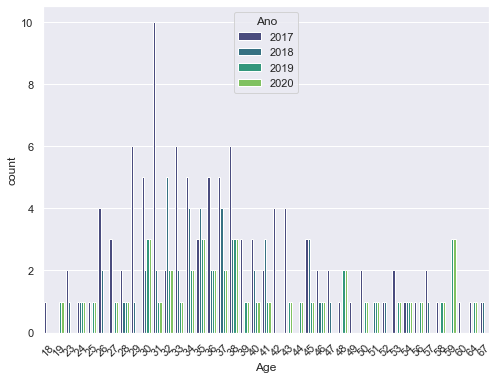

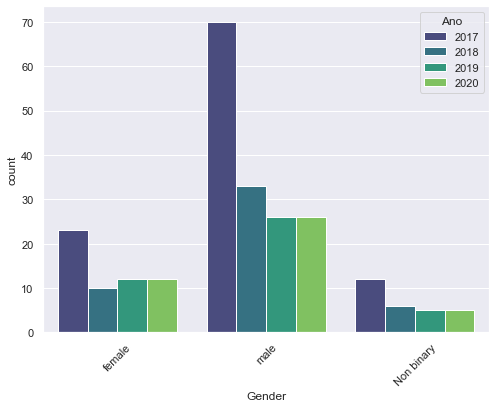

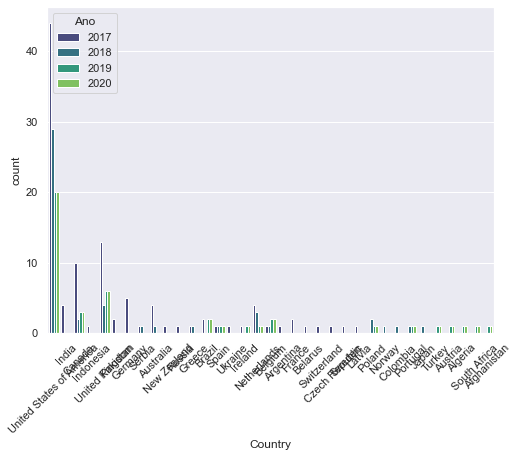

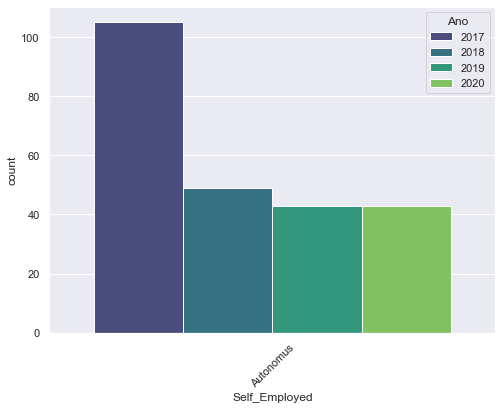

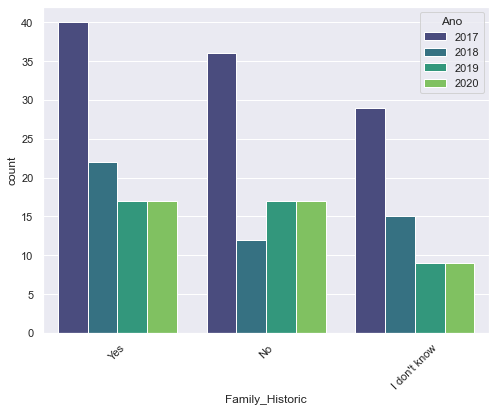

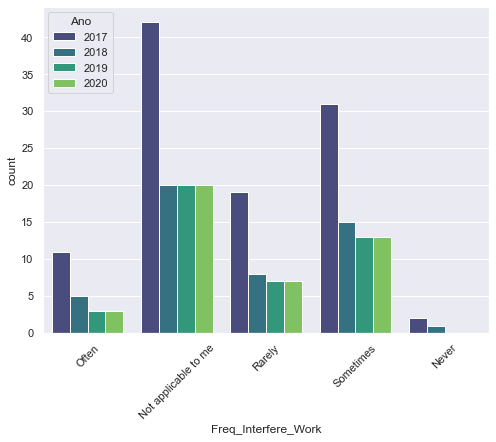

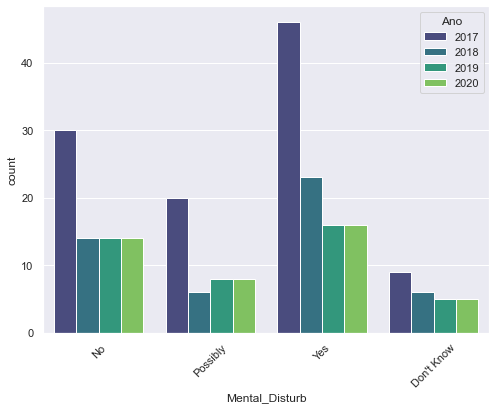

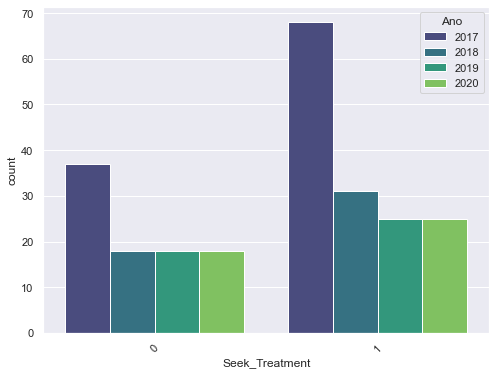

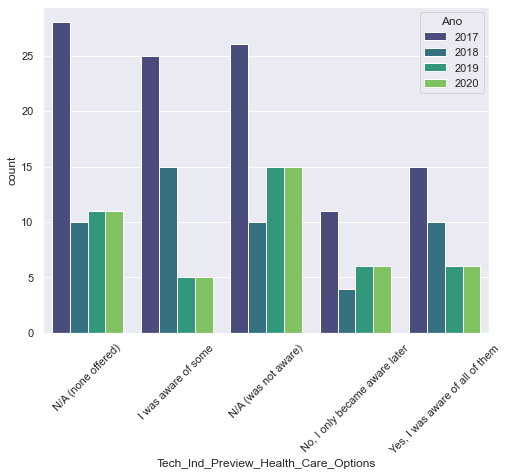

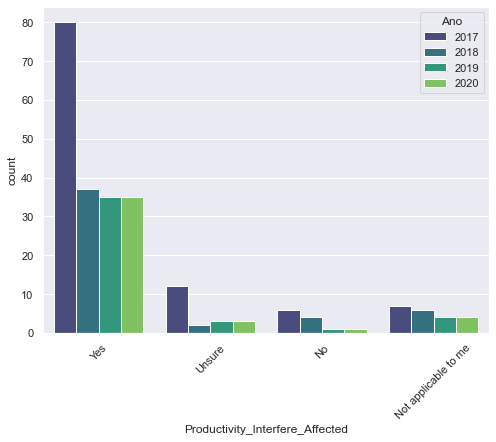

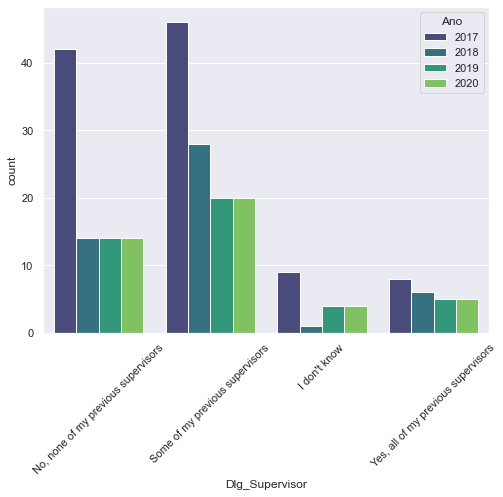

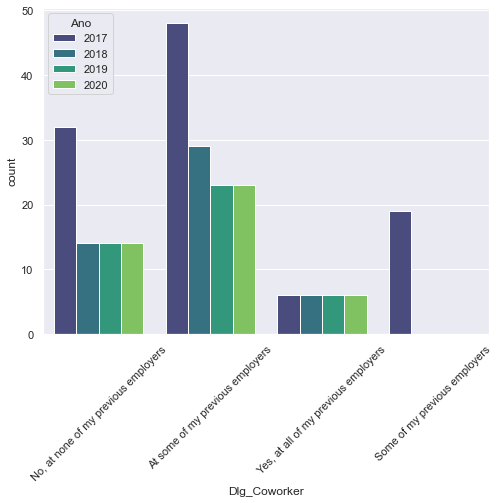

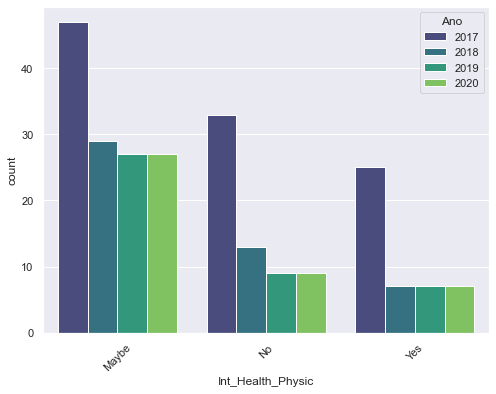

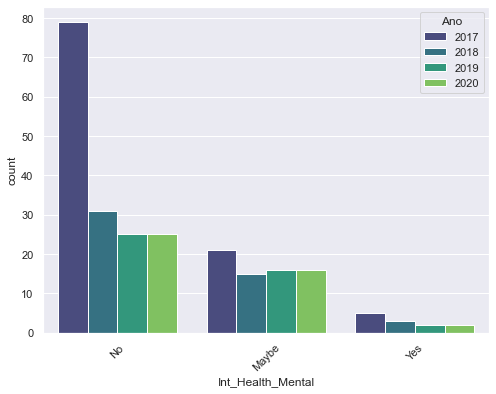

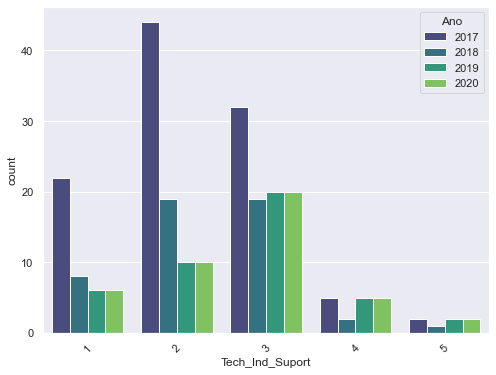

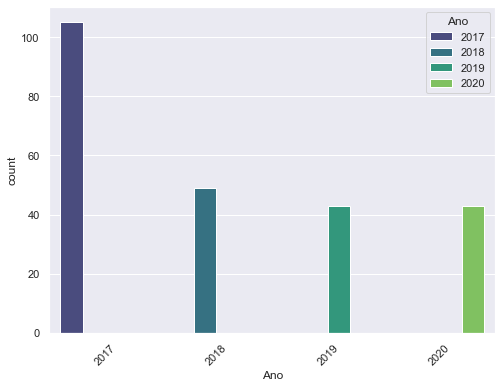

In [14]:
# Rodando nossas features para identificar possíveis correlações

features_1 = ['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options',
       'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
       'Int_Health_Physic', 'Int_Health_Mental', 'Tech_Ind_Suport', 'Ano']

for f in features_1:
    sns.countplot(x = f, data = df, palette = 'viridis', hue = 'Ano')
    plt.xticks(rotation=45)
    plt.show()

**Transformando as variáveis categóricas em Dummyes**

In [15]:
print(df.shape)

# Manter somente as colunas realmente relevantes Eliminar a coluna Country, e Ano por enquanto para não atrapalhar a análise
features_2 = ['Age', 'Gender', 'Self_Employed', 'Family_Historic',
             'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
             'Tech_Ind_Preview_Health_Care_Options',
             'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
             'Int_Health_Physic', 'Int_Health_Mental', 'Tech_Ind_Suport']

df_dummy = df[features_2]
print(df_dummy.shape)

(240, 16)
(240, 14)


**Para melhorar ainda mais os resultados do cluster, irei transformar a variável idade em categórica e a nota das industrias em relação a assistencia para o distúrbio mental, conforme a seguir:**

In [16]:
# Transformando a coluna Age

# Coluna year para representar a idade categoricamente
df_dummy['Year'] = 0
df_dummy['Year'][(df_dummy['Age'] < 25)] = 'Young'
df_dummy['Year'][(df_dummy['Age'] >= 25) & (df_dummy['Age'] <= 55)] = 'Adult'
df_dummy['Year'][(df_dummy['Age'] > 55)] = 'Old'

# Transformando a coluna Tech_Ind_Suport

# Nota das industrias em relação a assistência a saúde mental
df_dummy['Grate'] = 0
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] < 3)] = 'Low'
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] == 3)] = 'Mid'
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] > 3)] = 'High'

print(df_dummy.shape)
df_dummy

<ipython-input-16-37315558df4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Year'] = 0
<ipython-input-16-37315558df4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Year'][(df_dummy['Age'] < 25)] = 'Young'
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=

(240, 16)


Age      Gender Self_Employed Family_Historic   Freq_Interfere_Work  \
0     52      female     Autonomus             Yes                 Often   
1     36        male     Autonomus              No                 Often   
2     53        male     Autonomus              No  Not applicable to me   
3     46        male     Autonomus    I don't know                Rarely   
4     29  Non binary     Autonomus    I don't know                 Often   
5     25  Non binary     Autonomus             Yes                Rarely   
6     43      female     Autonomus             Yes             Sometimes   
7     45        male     Autonomus    I don't know  Not applicable to me   
8     54      female     Autonomus             Yes             Sometimes   
9     38      female     Autonomus             Yes             Sometimes   
10    30        male     Autonomus             Yes             Sometimes   
11    26        male     Autonomus              No  Not applicable to me   
13    57      female     Autonomus             Yes             Sometimes   
14    31      female     Autonomus              No             Sometimes   
15    29        male     Autonomus    I don't know  Not applicable to me   
16    18  Non binary     Autonomus    I don't know  Not applicable to me   
17    48      female     Autonomus              No             Sometimes   
18    33      female     Autonomus              No             Sometimes   
19    41        male     Autonomus              No  Not applicable to me   
21    31        male     Autonomus              No  Not applicable to me   
22    36      female     Autonomus             Yes                Rarely   
23    29      female     Autonomus    I don't know                 Never   
25    35        male     Autonomus              No  Not applicable to me   
27    36        male     Autonomus    I don't know  Not applicable to me   
28    45        male     Autonomus             Yes                Rarely   
29    28        male     Autonomus              No                 Often   
30    64        male     Autonomus              No             Sometimes   
32    34        male     Autonomus             Yes                 Often   
34    26        male     Autonomus              No  Not applicable to me   
36    42  Non binary     Autonomus              No  Not applicable to me   
37    31        male     Autonomus             Yes  Not applicable to me   
38    28      female     Autonomus    I don't know                Rarely   
39    33      female     Autonomus             Yes             Sometimes   
40    47        male     Autonomus              No             Sometimes   
41    42        male     Autonomus              No  Not applicable to me   
42    35        male     Autonomus    I don't know             Sometimes   
43    30      female     Autonomus    I don't know                Rarely   
44    50      female     Autonomus    I don't know                Rarely   
45    58      female     Autonomus             Yes             Sometimes   
46    43        male     Autonomus              No                 Often   
47    39        male     Autonomus    I don't know  Not applicable to me   
48    40        male     Autonomus    I don't know             Sometimes   
49    26        male     Autonomus             Yes                Rarely   
50    23        male     Autonomus             Yes                Rarely   
51    53        male     Autonomus    I don't know             Sometimes   
52    24        male     Autonomus             Yes                Rarely   
53    32        male     Autonomus    I don't know  Not applicable to me   
54    31        male     Autonomus    I don't know             Sometimes   
55    67      female     Autonomus              No                 Often   
57    46        male     Autonomus    I don't know                 Often   
58    29        male     Autonomus              No                Rarely   
59    30        male     Autonomus             Yes   

In [17]:
df_dummy.columns

Index(['Age', 'Gender', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options',
       'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
       'Int_Health_Physic', 'Int_Health_Mental', 'Tech_Ind_Suport', 'Year',
       'Grate'],
      dtype='object')

In [18]:
# Atribuindo as novas variáveis ao modelo
features_3 = ['Year','Gender', 'Self_Employed', 'Family_Historic',
             'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
             'Tech_Ind_Preview_Health_Care_Options', 'Grate',
             'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
             'Int_Health_Physic', 'Int_Health_Mental']

df_dummy = df_dummy[features_3]

# Making categorical variables into numeric representation
df_dummy = pd.get_dummies(df_dummy, columns = features_3)

# print the shape
print(df_dummy.shape)

df_dummy.head()

(240, 47)


Year_Adult  Year_Old  Year_Young  Gender_Non binary  Gender_female  \
0           1         0           0                  0              1   
1           1         0           0                  0              0   
2           1         0           0                  0              0   
3           1         0           0                  0              0   
4           1         0           0                  1              0   

   Gender_male  Self_Employed_Autonomus  Family_Historic_I don't know  \
0            0                        1                             0   
1            1                        1                             0   
2            1                        1                             0   
3            1                        1                             1   
4            0                        1                             1   

   Family_Historic_No  Family_Historic_Yes  Freq_Interfere_Work_Never  \
0                   0                    1                          0   
1                   1                    0                          0   
2                   1                    0                          0   
3                   0                    0                          0   
4                   0                    0                          0   

   Freq_Interfere_Work_Not applicable to me  Freq_Interfere_Work_Often  \
0                                         0                          1   
1                                         0                          1   
2                                         1                          0   
3                                         0                          0   
4                                         0                          1   

   Freq_Interfere_Work_Rarely  Freq_Interfere_Work_Sometimes  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           1                              0   
4                           0                              0   

   Mental_Disturb_Don't Know  Mental_Disturb_No  Mental_Disturb_Possibly  \
0                          0                  1                        0   
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  0                        0   
4                          0                  0                        0   

   Mental_Disturb_Yes  Seek_Treatment_0  Seek_Treatment_1  \
0                   0                 0                 1   
1                   0                 0                 1   
2                   0                 1                 0   
3                   1                 0                 1   
4                   1                 0                 1   

   Tech_Ind_Preview_Health_Care_Options_I was aware of some  \
0                                                  0          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  0          

   Tech_Ind_Preview_Health_Care_Options_N/A (none offered)  \
0                                                  1         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Tech_Ind_Preview_Health_Care_Options_N/A (was not aware)  \
0                                                  0          
1                                                  0          
2                                                  1          
3                           

**K-means Clustering**

1. Seleciona K centróides

2. Assinala os casos para os centróides mais próximos

3. Atualiza os centróides

4. Re-assinala todos os casos

5. Repete os passos 3 e 4 até a convergência

In [19]:
X_train = df_dummy.values

# Vamos iniciar com 3 clusters

kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_train)

# Printar os clusters para cada observação
print("The clusters are: ", kmeans.labels_)

# Printar a inércia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 1 2 1 0 2 1 0 1 0 1 2 1 1 2 2 2 0 0 2 0 0 1 0 1 0 1 0 2 2 2 0 1 0 2 1 0
 1 0 1 2 0 0 1 0 1 2 0 1 2 1 0 2 2 0 2 1 2 2 2 2 2 0 0 1 0 0 0 1 2 0 0 0 2
 1 1 1 2 0 2 2 0 1 2 0 0 2 2 0 1 2 1 1 2 2 1 0 2 1 0 1 2 1 0 1 2 1 1 0 1 2
 2 2 1 1 0 1 2 2 1 1 1 1 1 1 2 1 2 2 0 1 2 2 0 1 1 0 2 1 0 1 0 2 0 0 1 2 1
 1 1 2 0 0 1 1 2 2 2 2 1 1 1 2 2 1 0 2 0 0 1 2 1 0 1 2 2 1 0 1 0 1 1 1 2 2
 2 1 1 2 2 2 2 0 0 0 0 2 1 2 2 2 2 1 1 1 2 2 1 0 2 0 0 1 2 1 0 1 2 2 1 0 1
 0 1 1 1 2 2 2 1 1 2 2 2 2 0 0 0 0 2]
The Inertia is:  1442.612175102599


In [20]:
kmeans.labels_.shape

(240,)

**O que é a Inércia**:

Inércia é a soma dos quadrados internos. É uma métrica que mostra o quão coerentes os clusters estão. A inércia pressupõe que os aglomerados são convexos e isotrópicos; executa clusters mal alongados, ou coletores com formas irregulares; melhor usar clustering hierárquico aqui. A inércia também tem um desempenho ruim em espaços muito dimensionais, uma vez que as distâncias euclidianas se tornam infladas e nenhuma normalização é aplicada de antemão; não é uma métrica normalizada.

In [21]:
# Encontrando o melhor número de Ks?

# Rodando K-means para multiplos números de Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 1527.8857142857137
The innertia for : 3 Clusters is: 1442.612175102599
The innertia for : 4 Clusters is: 1380.2601226017032
The innertia for : 5 Clusters is: 1331.1869097777821
The innertia for : 6 Clusters is: 1295.7029965609431
The innertia for : 7 Clusters is: 1269.6133198581479
The innertia for : 8 Clusters is: 1219.5048199399503
The innertia for : 9 Clusters is: 1186.5015642312064
The innertia for : 10 Clusters is: 1182.1210697197544
The innertia for : 11 Clusters is: 1138.0963153548523
The innertia for : 12 Clusters is: 1118.2065329581117
The innertia for : 13 Clusters is: 1100.7698335226933
The innertia for : 14 Clusters is: 1076.5497892458418
The innertia for : 15 Clusters is: 1068.4127940686772
The innertia for : 16 Clusters is: 1045.8265213218153
The innertia for : 17 Clusters is: 1025.1602150537647
The innertia for : 18 Clusters is: 1015.9632942650745
The innertia for : 19 Clusters is: 991.8845595494981


In [22]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inércia por Ks')

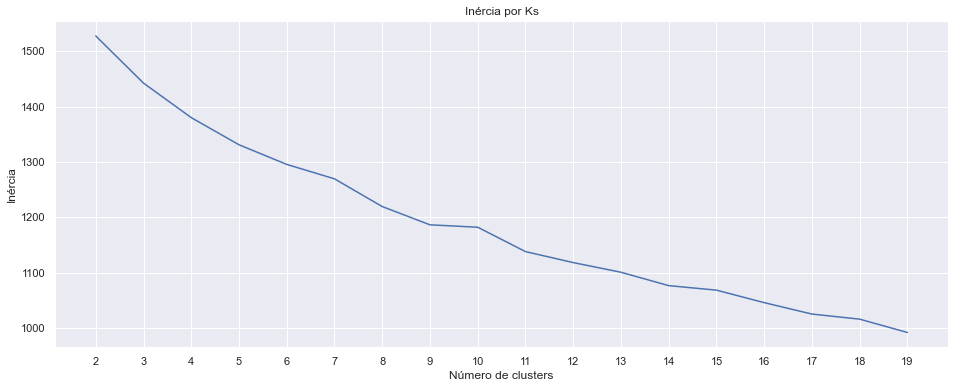

In [23]:
# Plotando o gráfico de Elbow para auxílio na escolha do número de Ks
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

In [24]:
# Rodando K means para 3 clusters

kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predições" para os dados
predictions = kmeans.predict(X_train)

# Calculando contagens dos clusters
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Criando um dataframe
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2
0         68         86         86

In [25]:
kmeans.labels_

array([0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2])

In [26]:
predictions

array([0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2])

In [27]:
df_dummy.shape

(240, 47)

**Running Principal Component Analysis (PCA) to Visualize & improve results**

**O que é a PCA**:

O PCA é uma técnica de redução de dimensionalidade que transforma uma série de variáveis possivelmente correlacionadas em um número menor de variáveis não corrigidas; chamados componentes principais. O objetivo da PCA é extrair as informações mais importantes da tabela de dados, comprimindo o tamanho do conjunto de dados e mantendo apenas as informações importantes; em seguida, o PCA computa novas variáveis chamadas componentes principais.

Explicação da variância nos 2 primeiros componentes: [0.160059 0.096147]
A porcentagem total da variância explicada pelos dois componentes: 0.25620618241778537


<Figure size 576x432 with 0 Axes>

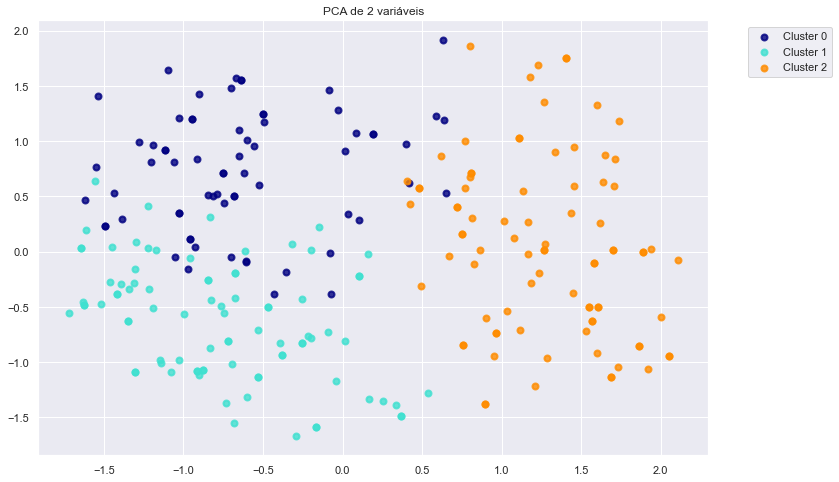

In [28]:
# Rodando a PCA

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

# Vamos pedir 2 componentes pois queremos plotar um gráfico cartesiano x,y.
pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Porcentagem da variação explicada pelos 2 componentes principais
print('Explicação da variância nos 2 primeiros componentes: %s' % str(pca.explained_variance_ratio_))
print('A porcentagem total da variância explicada pelos dois componentes: %s' % sum(pca.explained_variance_ratio_))

# Pltando os dados
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA de 2 variáveis')
plt.show()

**Por que a redução da dimensionalidade pode ajudar o k-means a ter melhor desempenho**:

Kmeans é extremamente sensível à escala, e quando você tem um monte de atributos não há mais escala verdadeira. É aqui que o PCA entra, já que limpa seus dados.

Ao fazer isso, você removerá a correlação global que às vezes pode dar melhores resultados. K-means é um problema de otimização "menos quadrados"; mesmo com o PCA.

Kmeans tenta encontrar a divisão menos quadrada dos dados, enquanto o PCA encontra o vetor de membros de cluster menos quadrados. O primeiro eigenvector tem a maior variância (menor inércia), portanto, a divisão deste vetor (que mostra a associação de cluster - não coordenadas de dados de entrada) significa maximização da variância do cluster; melhor adequado para Kmeans.

Ao maximizar entre a variância do cluster, você minimiza a variância dentro do cluster. Portanto, aplicar o PCA antes do cluster pode potencialmente ajudá-lo a obter melhores clusters (com mais variância) em Kmeansents.

**Identificando o melhor número de componentes**

A variância total do dataset é:  7.3527545327754495
A porcentagem de 95% da variância que queremos é:  6.985116806136677

Variância explicada através de 15 componentes:  5.777290916973462
Variância explicada através de 20 componentes:  6.508834722142747
Variância explicada através de 25 componentes:  6.985990256536148
Variância explicada através de 27 componentes:  7.11810754518411
Variância explicada através de 35 componentes:  7.3527545327754495
Variância explicada através de 40 componentes:  7.3527545327754495
Variância explicada através de 45 componentes:  7.3527545327754495
Variância explicada através de 50 componentes:  7.3527545327754495


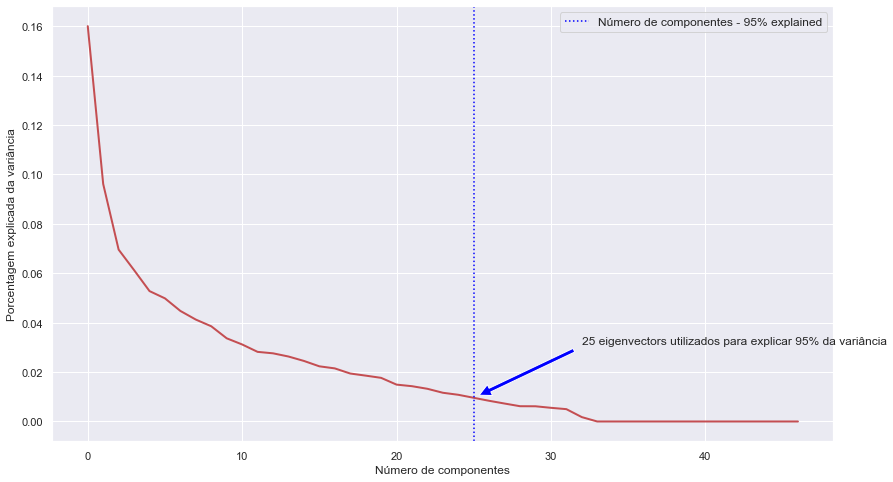

In [29]:
# Redução dimensional e posteriormente K-means

n_components = X.shape[1]

# Rodando a PCA com todos os componentes
pca = PCA(n_components=n_components, random_state = 500)
X_r = pca.fit(X).transform(X)


# Calculando o 95% da variância
total_variance = sum(pca.explained_variance_)
print("A variância total do dataset é: ", total_variance)
var_95 = total_variance * 0.95
print("A porcentagem de 95% da variância que queremos é: ", var_95)
print("")

# Criando o dataframe com os componentes e explicando a variância
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Variância Explicada"])

# Tentando atingir 95% de explicação da variância
print("Variância explicada através de 15 componentes: ", sum(a["Variância Explicada"][0:15]))
print("Variância explicada através de 20 componentes: ", sum(a["Variância Explicada"][0:20]))
print("Variância explicada através de 25 componentes: ", sum(a["Variância Explicada"][0:25]))
print("Variância explicada através de 27 componentes: ", sum(a["Variância Explicada"][0:27]))
print("Variância explicada através de 35 componentes: ", sum(a["Variância Explicada"][0:35]))
print("Variância explicada através de 40 componentes: ", sum(a["Variância Explicada"][0:40]))
print("Variância explicada através de 45 componentes: ", sum(a["Variância Explicada"][0:45]))
print("Variância explicada através de 50 componentes: ", sum(a["Variância Explicada"][0:50]))


# Plotando os dados
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('Número de componentes')
plt.ylabel('Porcentagem explicada da variância')

# Plotando linha referência para 95% e.v.
plt.axvline(25,linestyle=':', label='Número de componentes - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adicionando um vetor explicativo
plt.annotate('25 eigenvectors utilizados para explicar 95% da variância', xy=(25, pca.explained_variance_ratio_[25]), 
             xytext=(32, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

A inércia para : 2 Clusters é de: 1440.227357521141
A inércia para : 3 Clusters é de: 1355.6951029164263
A inércia para : 4 Clusters é de: 1295.5582024035741
A inércia para : 5 Clusters é de: 1249.9188089564875
A inércia para : 6 Clusters é de: 1203.7876208698247
A inércia para : 7 Clusters é de: 1172.074187809315
A inércia para : 8 Clusters é de: 1143.1734946934448
A inércia para : 9 Clusters é de: 1108.750582946621
A inércia para : 10 Clusters é de: 1081.671637896136
A inércia para : 11 Clusters é de: 1049.8450427372154
A inércia para : 12 Clusters é de: 1035.7611302846576
A inércia para : 13 Clusters é de: 1015.1501248752544
A inércia para : 14 Clusters é de: 993.9805900769503
A inércia para : 15 Clusters é de: 962.1122624519865
A inércia para : 16 Clusters é de: 962.4766034754246
A inércia para : 17 Clusters é de: 938.7094319698843
A inércia para : 18 Clusters é de: 932.917971984475
A inércia para : 19 Clusters é de: 911.8693832809578


Text(0.5, 1.0, 'Inércia por Ks')

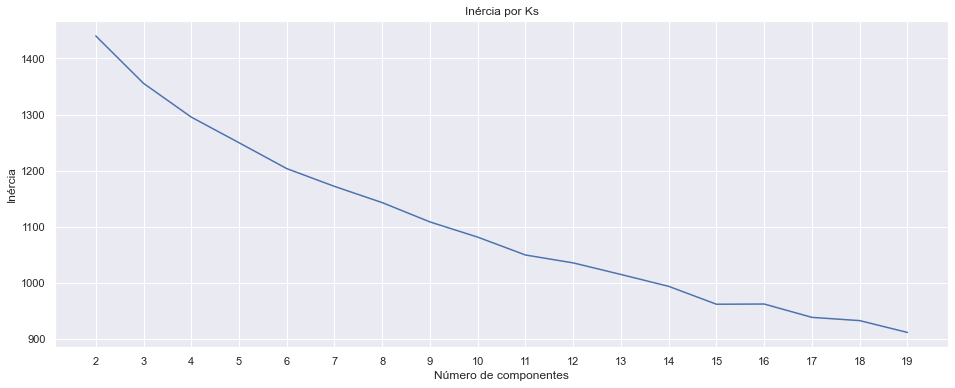

In [30]:
# Rodando a PCA com o valor ótimo

pca = PCA(n_components=25, random_state = 500)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

# Gerando o gráfico de Elbow para as inércias identificadas
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, conseguimos reduzir no inércia de **1442.61** para **1355.69!**

**Para melhorar ainda mais nosso resultado, vamos combinar/agrupar observações que sejam semelhantes**

In [31]:
# Removendo caracteres indesejados
df_dummy.columns = df_dummy.columns.str.replace("'","")
df_dummy.columns = df_dummy.columns.str.replace("(","")
df_dummy.columns = df_dummy.columns.str.replace(")","")
df_dummy.columns = df_dummy.columns.str.replace("/","")

df_dummy.columns

<ipython-input-31-ca70d33a1509>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dummy.columns = df_dummy.columns.str.replace("(","")
<ipython-input-31-ca70d33a1509>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dummy.columns = df_dummy.columns.str.replace(")","")


Index(['Year_Adult', 'Year_Old', 'Year_Young', 'Gender_Non binary',
       'Gender_female', 'Gender_male', 'Self_Employed_Autonomus',
       'Family_Historic_I dont know', 'Family_Historic_No',
       'Family_Historic_Yes', 'Freq_Interfere_Work_Never',
       'Freq_Interfere_Work_Not applicable to me', 'Freq_Interfere_Work_Often',
       'Freq_Interfere_Work_Rarely', 'Freq_Interfere_Work_Sometimes',
       'Mental_Disturb_Dont Know', 'Mental_Disturb_No',
       'Mental_Disturb_Possibly', 'Mental_Disturb_Yes', 'Seek_Treatment_0',
       'Seek_Treatment_1',
       'Tech_Ind_Preview_Health_Care_Options_I was aware of some',
       'Tech_Ind_Preview_Health_Care_Options_NA none offered',
       'Tech_Ind_Preview_Health_Care_Options_NA was not aware',
       'Tech_Ind_Preview_Health_Care_Options_No, I only became aware later',
       'Tech_Ind_Preview_Health_Care_Options_Yes, I was aware of all of them',
       'Grate_High', 'Grate_Low', 'Grate_Mid',
       'Productivity_Interfere_Affected_N

In [32]:
# Limpeza/Combinação de variáveis para melhorar os resultados 

print("The shape is: ", df_dummy.shape)


# Limpando a coluna de Freq_Interfere_Work


# Sometimes with Often
df_dummy['Freq_Interfere_Work_Some'] = 0
df_dummy['Freq_Interfere_Work_Some'][
            (df_dummy['Freq_Interfere_Work_Sometimes'] == 1) | (df_dummy['Freq_Interfere_Work_Often'] == 1)] = 1

# Never with Rarely
df_dummy['Freq_Interfere_Work_NotSome'] = 0
df_dummy['Freq_Interfere_Work_NotSome'][
            (df_dummy['Freq_Interfere_Work_Never'] == 1) | (df_dummy['Freq_Interfere_Work_Rarely'] == 1)] = 1


# Limpando a coluna Tech_Ind_Preview_Health_Care_Options

# I was aware of some e Yes, I was aware of all of them
df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'] = 0
df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'][
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_I was aware of some'] == 1) | 
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_Yes, I was aware of all of them'] == 1)] = 1

# N/A was not aware e No, I only became aware later
df_dummy['Tech_Ind_Preview_Health_Care_Options_Not_Aware'] = 0
df_dummy['Tech_Ind_Preview_Health_Care_Options_Not_Aware'][
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_NA was not aware'] == 1) |
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_No, I only became aware later'] == 1)] = 1

The shape is:  (240, 47)


<ipython-input-32-45acbcc909f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Freq_Interfere_Work_Some'][
<ipython-input-32-45acbcc909f4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Freq_Interfere_Work_NotSome'][
<ipython-input-32-45acbcc909f4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'][
<ipython-input-32-45acbcc909f4>:30: SettingWithCopyWarning

In [33]:
features_Optimus = ['Year_Young', 'Year_Adult', 'Year_Old',
                   'Gender_Non binary', 'Gender_female','Gender_male',
                   'Self_Employed_Autonomus', 'Family_Historic_I dont know',
                   'Family_Historic_No', 'Family_Historic_Yes',
                   'Freq_Interfere_Work_Some', 'Freq_Interfere_Work_Not applicable to me',
                   'Freq_Interfere_Work_NotSome',
                   'Mental_Disturb_No', 'Mental_Disturb_Possibly', 'Mental_Disturb_Yes',
                   'Seek_Treatment_0', 'Seek_Treatment_1',
                   'Tech_Ind_Preview_Health_Care_Options_Aware',
                   'Tech_Ind_Preview_Health_Care_Options_NA none offered',
                   'Tech_Ind_Preview_Health_Care_Options_Not_Aware',
                   'Productivity_Interfere_Affected_No',
                   'Productivity_Interfere_Affected_Not applicable to me',
                   'Productivity_Interfere_Affected_Unsure',
                   'Productivity_Interfere_Affected_Yes',
                   'Dlg_Supervisor_I dont know',
                   'Dlg_Supervisor_No, none of my previous supervisors',
                   'Dlg_Supervisor_Some of my previous supervisors',
                   'Dlg_Supervisor_Yes, all of my previous supervisors',
                   'Dlg_Coworker_At some of my previous employers',
                   'Dlg_Coworker_No, at none of my previous employers',
                   'Dlg_Coworker_Some of my previous employers',
                   'Dlg_Coworker_Yes, at all of my previous employers',
                   'Int_Health_Physic_Maybe', 'Int_Health_Physic_No',
                   'Int_Health_Physic_Yes', 'Int_Health_Mental_Maybe',
                   'Int_Health_Mental_No', 'Int_Health_Mental_Yes',
                   'Grate_Low','Grate_Mid','Grate_High']

A inércia para : 2 Clusters é de: 1455.14609302657
A inércia para : 3 Clusters é de: 1368.5860520643607
A inércia para : 4 Clusters é de: 1313.766404657583
A inércia para : 5 Clusters é de: 1258.0260891969788
A inércia para : 6 Clusters é de: 1228.40279745928
A inércia para : 7 Clusters é de: 1184.9899672399667
A inércia para : 8 Clusters é de: 1147.5961288547785
A inércia para : 9 Clusters é de: 1119.1314476434034
A inércia para : 10 Clusters é de: 1099.1946444575594
A inércia para : 11 Clusters é de: 1074.9206818181826
A inércia para : 12 Clusters é de: 1050.668438264634
A inércia para : 13 Clusters é de: 1031.6417676338936
A inércia para : 14 Clusters é de: 1000.0401055111408
A inércia para : 15 Clusters é de: 999.3154739790647
A inércia para : 16 Clusters é de: 973.7749543731122
A inércia para : 17 Clusters é de: 958.9237392509456
A inércia para : 18 Clusters é de: 938.2080160687324
A inércia para : 19 Clusters é de: 932.631534184769
A inércia para : 20 Clusters é de: 903.792922926

Text(0.5, 1.0, 'Inércia por Ks')

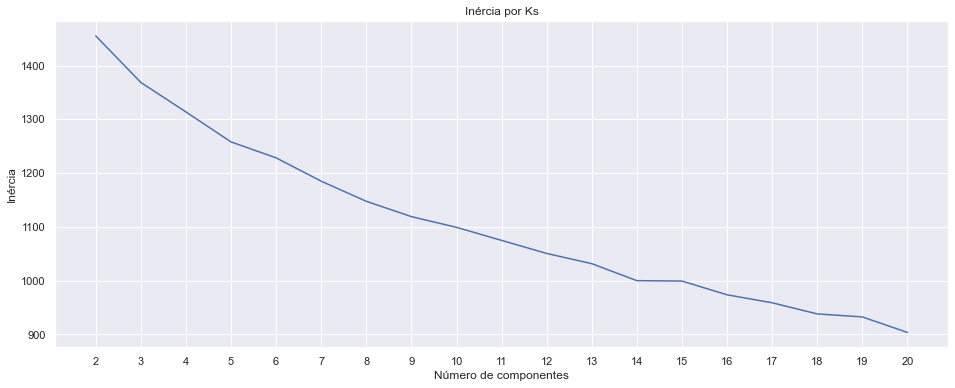

In [34]:
# Rodando novamente o K-means com as variáveis combinadas

X_train = df_dummy[features_Optimus].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, a inércia aumentou de **1355.69!** para **1368.58**, vejamos se conseguimos abaixar com o restante do processo!

Explicação da variância nos 2 primeiros componentes: [0.170664 0.099987]
A porcentagem total da variância explicada pelos dois componentes: 0.2706511780834564


<Figure size 576x432 with 0 Axes>

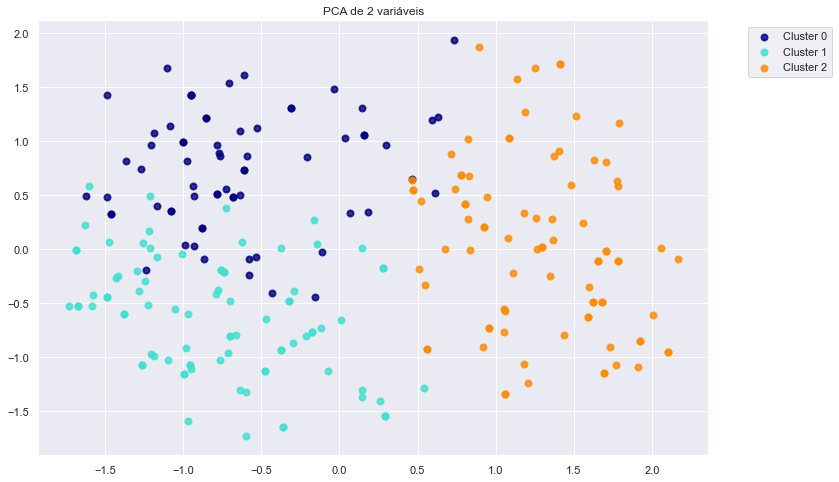

In [35]:
#Rodando a PCA no dataset otimizado

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

# Vamos pedir 2 componentes pois queremos plotar um gráfico cartesiano x,y.
pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Porcentagem da variação explicada pelos 2 componentes principais
print('Explicação da variância nos 2 primeiros componentes: %s' % str(pca.explained_variance_ratio_))
print('A porcentagem total da variância explicada pelos dois componentes: %s' % sum(pca.explained_variance_ratio_))

# Pltando os dados
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA de 2 variáveis')
plt.show()

A variância total do dataset é:  7.07289051603905
A porcentagem de 95% da variância que queremos é:  6.719245990237097

Variância explicada através de 10 componentes:  4.871099221230264
Variância explicada através de 15 componentes:  5.896675238573688
Variância explicada através de 22 componentes:  6.733526325839042
Variância explicada através de 25 componentes:  6.925597986463353
Variância explicada através de 30 componentes:  7.07289051603905
Variância explicada através de 35 componentes:  7.07289051603905


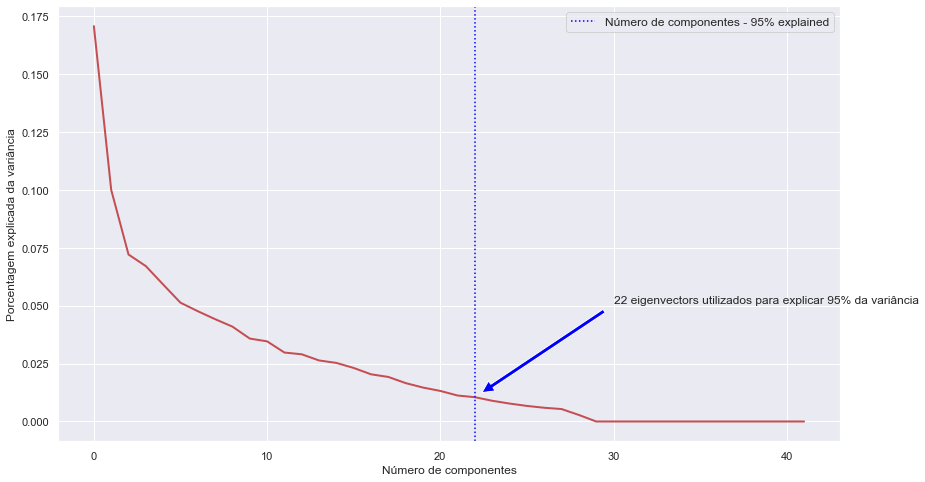

In [36]:
# Redução dimensional e posteriormente K-means no dataset otimizado

n_components = X.shape[1]

# Rodando a PCA com todos os componentes
pca = PCA(n_components=n_components, random_state = 500)
X_r = pca.fit(X).transform(X)


# Calculando o 95% da variância
total_variance = sum(pca.explained_variance_)
print("A variância total do dataset é: ", total_variance)
var_95 = total_variance * 0.95
print("A porcentagem de 95% da variância que queremos é: ", var_95)
print("")

# Criando o dataframe com os componentes e explicando a variância
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Variância Explicada"])

# Tentando atingir 95% de explicação da variância
print("Variância explicada através de 10 componentes: ", sum(a["Variância Explicada"][0:10]))
print("Variância explicada através de 15 componentes: ", sum(a["Variância Explicada"][0:15]))
print("Variância explicada através de 22 componentes: ", sum(a["Variância Explicada"][0:22]))
print("Variância explicada através de 25 componentes: ", sum(a["Variância Explicada"][0:25]))
print("Variância explicada através de 30 componentes: ", sum(a["Variância Explicada"][0:30]))
print("Variância explicada através de 35 componentes: ", sum(a["Variância Explicada"][0:35]))

# Plotando os dados
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('Número de componentes')
plt.ylabel('Porcentagem explicada da variância')

# Plotando linha referência para 95% e.v.
plt.axvline(22,linestyle=':', label='Número de componentes - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adicionando um vetor explicativo
plt.annotate('22 eigenvectors utilizados para explicar 95% da variância', xy=(22, pca.explained_variance_ratio_[22]), 
             xytext=(30, pca.explained_variance_ratio_[5]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

A inércia para : 2 Clusters é de: 1374.0970904998662
A inércia para : 3 Clusters é de: 1287.6486833479805
A inércia para : 4 Clusters é de: 1232.8125833318318
A inércia para : 5 Clusters é de: 1175.3715603647793
A inércia para : 6 Clusters é de: 1142.604716007884
A inércia para : 7 Clusters é de: 1102.9060322910323
A inércia para : 8 Clusters é de: 1076.0400406821598
A inércia para : 9 Clusters é de: 1046.1203731830676
A inércia para : 10 Clusters é de: 1018.7294206935779
A inércia para : 11 Clusters é de: 995.4085603804307
A inércia para : 12 Clusters é de: 967.6822828519524
A inércia para : 13 Clusters é de: 950.802508852463
A inércia para : 14 Clusters é de: 927.1515803473238
A inércia para : 15 Clusters é de: 909.871257956397
A inércia para : 16 Clusters é de: 892.0462315910294
A inércia para : 17 Clusters é de: 877.1514690174333
A inércia para : 18 Clusters é de: 863.3020735605293
A inércia para : 19 Clusters é de: 846.5620925048989
A inércia para : 20 Clusters é de: 825.307127805

Text(0.5, 1.0, 'Inércia por Ks')

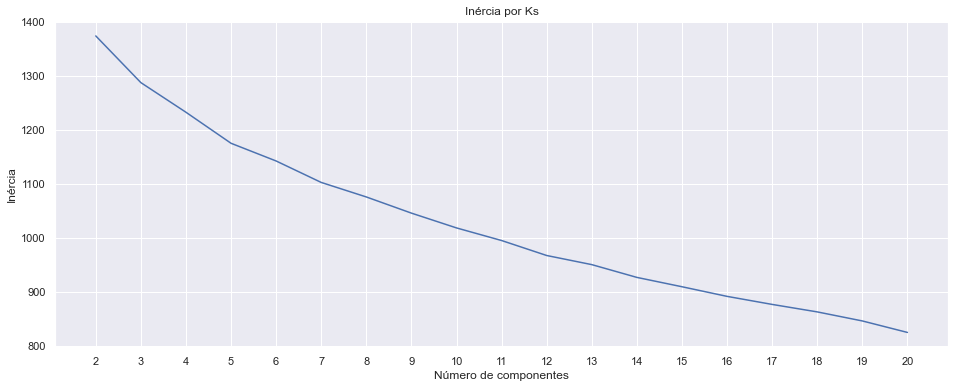

In [37]:
# Rodando a PCA com o valor ótimo de eignvector no dataset otimizado

pca = PCA(n_components=22, random_state = 500)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

# Gerando o gráfico de Elbow para as inércias identificadas
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, conseguimos reduzir no inércia de **1368.58** para **1287.65!** Apesar de termos aumentado ela um pouco antes, o processo final mostrou-se eficaz na redução!

**Rodando a K-means com 3 clusters e usando a PCA com 22 componentes**

In [38]:
# Rodando PCA com 22 PC
pca = PCA(n_components=22, random_state = 500)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 3 Ks
kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'


df.head(5)

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Age      Gender                   Country Self_Employed Family_Historic  \
0   52      female  United States of America     Autonomus             Yes   
1   36        male                     India     Autonomus              No   
2   53        male  United States of America     Autonomus              No   
3   46        male  United States of America     Autonomus    I don't know   
4   29  Non binary                    Canada     Autonomus    I don't know   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
0                 Often             No               1   
1                 Often       Possibly               1   
2  Not applicable to me             No               0   
3                Rarely            Yes               1   
4                 Often            Yes               1   

  Tech_Ind_Preview_Health_Care_Options Productivity_Interfere_Affected  \
0                   N/A (none offered)                             Yes   
1                  I was aware of some                          Unsure   
2                  N/A (was not aware)                             Yes   
3        No, I only became aware later                             Yes   
4                  N/A (was not aware)                             Yes   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  No, none of my previous supervisors  No, at none of my previous employers   
1      Some of my previous supervisors      At some of my previous employers   
2      Some of my previous supervisors  No, at none of my previous employers   
3      Some of my previous supervisors      At some of my previous employers   
4      Some of my previous supervisors  No, at none of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport   Ano  Clusters  \
0             Maybe                No                1  2017         2   
1             Maybe                No                3  2017         0   
2                No                No                2  2017         1   
3             Maybe                No                3  2017         0   
4               Yes                No                2  2017         2   

  Clusters Category  
0         Cluster 3  
1         Cluster 1  
2         Cluster 2  
3         Cluster 1  
4         Cluster 3

In [39]:
# Removendo caracteres indesejados
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")
df.columns = df.columns.str.replace("/","")

# Pegando nome das colunas para função mais abaixo
df.columns

<ipython-input-39-c929c30dc624>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(","")
<ipython-input-39-c929c30dc624>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")","")


Index(['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options',
       'Productivity_Interfere_Affected', 'Dlg_Supervisor', 'Dlg_Coworker',
       'Int_Health_Physic', 'Int_Health_Mental', 'Tech_Ind_Suport', 'Ano',
       'Clusters', 'Clusters Category'],
      dtype='object')

**Criando um ordenamento para futura visualização no BI**

In [40]:
# Gerando ordem para Family_Historic
df['Family_Historic_Order'] = 0
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'Yes'] = 1
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'I dont know'] = 2
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'No'] = 3

# Gerando ordem para Freq_Interfere_Work
df['Freq_Interfere_Work_Order'] = 0
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Often'] = 1
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Sometimes'] = 2
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Rarely'] = 3
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Never'] = 4
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Not applicable to me'] = 5

# Gerando ordem para Mental_Disturb 
df['Mental_Disturb_Order'] = 0
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Yes'] = 1
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Possibly'] = 2
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'No'] = 3
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Dont Know'] = 4

# Gerando ordem para Tech_Ind_Preview_Health_Care_Options 
df['Tech_Ind_Preview_Health_Care_Options_Order'] = 0
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'Yes, I was aware of all of them'] = 1
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'I was aware of some'] = 2
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'No, I only became aware later'] = 3
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'NA was not aware'] = 4
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'NA none offered'] = 5

# Gerando ordem para Productivity_Interfere_Affected 
df['Productivity_Interfere_Affected_Order'] = 0
df['Productivity_Interfere_Affected_Order'].loc[df['Productivity_Interfere_Affected'] == 'Yes'] = 1
df['Productivity_Interfere_Affected_Order'].loc[df['Productivity_Interfere_Affected'] == 'Unsure'] = 2
df['Productivity_Interfere_Affected_Order'].loc[df['Productivity_Interfere_Affected'] == 'No'] = 3
df['Productivity_Interfere_Affected_Order'].loc[df['Productivity_Interfere_Affected'] == 'Not applicable to me'] = 4

# Gerando ordem para Dlg_Supervisor  
df['Dlg_Superviso_Order'] = 0
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'Yes, all of my previous supervisors'] = 1
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'Some of my previous supervisors'] = 2
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'No, none of my previous supervisors'] = 3
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'I dont know'] = 4

# Gerando ordem para Dlg_Coworker  
df['Dlg_Coworker_Order'] = 0
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'Yes, at all of my previous employers'] = 1
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'At some of my previous employers'] = 2
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'No, at none of my previous employers'] = 3

# Gerando ordem para Int_Health_Physic   
df['Int_Health_Physic_Order'] = 0
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'Yes'] = 1
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'Maybe'] = 2
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'No'] = 3

# Gerando ordem para Int_Health_Mental    
df['Int_Health_Mental_Order'] = 0
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'Yes'] = 1
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'Maybe'] = 2
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'No'] = 3

# Gerando ordem para os Clusters
df['Clusters_Category_Order'] = 0
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 1'] = 1
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 2'] = 2
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 3'] = 3

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
# Exporting the data in a CSV

df.to_csv(r'C:\\Users\\Tuta\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\Python 3k\\OSMI_Aut_Cluster.csv', sep='\t', index=False)
df.head()

Age      Gender                   Country Self_Employed Family_Historic  \
0   52      female  United States of America     Autonomus             Yes   
1   36        male                     India     Autonomus              No   
2   53        male  United States of America     Autonomus              No   
3   46        male  United States of America     Autonomus    I don't know   
4   29  Non binary                    Canada     Autonomus    I don't know   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
0                 Often             No               1   
1                 Often       Possibly               1   
2  Not applicable to me             No               0   
3                Rarely            Yes               1   
4                 Often            Yes               1   

  Tech_Ind_Preview_Health_Care_Options Productivity_Interfere_Affected  \
0                   N/A (none offered)                             Yes   
1                  I was aware of some                          Unsure   
2                  N/A (was not aware)                             Yes   
3        No, I only became aware later                             Yes   
4                  N/A (was not aware)                             Yes   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  No, none of my previous supervisors  No, at none of my previous employers   
1      Some of my previous supervisors      At some of my previous employers   
2      Some of my previous supervisors  No, at none of my previous employers   
3      Some of my previous supervisors      At some of my previous employers   
4      Some of my previous supervisors  No, at none of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport   Ano  Clusters  \
0             Maybe                No                1  2017         2   
1             Maybe                No                3  2017         0   
2                No                No                2  2017         1   
3             Maybe                No                3  2017         0   
4               Yes                No                2  2017         2   

  Clusters Category  Family_Historic_Order  Freq_Interfere_Work_Order  \
0         Cluster 3                      1                          1   
1         Cluster 1                      3                          1   
2         Cluster 2                      3                          5   
3         Cluster 1                      0                          3   
4         Cluster 3                      0                          1   

   Mental_Disturb_Order  Tech_Ind_Preview_Health_Care_Options_Order  \
0                     3                                           0   
1                     2                                           2   
2                     3                                           0   
3                     1                                           3   
4                     1                                           0   

   Productivity_Interfere_Affected_Order  Dlg_Superviso_Order  \
0                                      1                    3   
1                                      2                    2   
2                                      1                    2   
3                                      1                    2   
4                                      1                    2   

   Dlg_Coworker_Order  Int_Health_Physic_Order  Int_Health_Mental_Order  \
0                   3                        2                        3   
1                   2                        2                        3   
2                   3                        3                        3   
3                   2                        2                        3   
4                   3                        1                        3   

   Clusters_Category_Order  
0                        3  
1                        1  
2                  

# Amostragem: Método da Estratificação

A ideia é coletar de forma aleatória 30 amostras de cada ano para cada um dos 5 clusters gerados para inferência estatística


In [42]:
# Aplicando o Stratified Sample no dataframe e salvando como um dataframe novo

df_sample = df.groupby(['Clusters Category', 'Ano'], group_keys=False).apply(lambda x: x.sample(n=5, random_state = 500))

df_sample = pd.DataFrame(df_sample)

# Exporting the data in a CSV

df_sample.to_csv(r'C:\\Users\\Tuta\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\Python 3k\\OSMI_Aut_SampleCluster.csv', sep='\t', index=False)
df_sample.head()

Age  Gender                   Country Self_Employed Family_Historic  \
1     36    male                     India     Autonomus              No   
10    30    male  United States of America     Autonomus             Yes   
83    29    male  United States of America     Autonomus             Yes   
106   35  female  United States of America     Autonomus             Yes   
13    57  female  United States of America     Autonomus             Yes   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
1                 Often       Possibly               1   
10            Sometimes            Yes               1   
83               Rarely            Yes               1   
106              Rarely            Yes               1   
13            Sometimes            Yes               1   

    Tech_Ind_Preview_Health_Care_Options Productivity_Interfere_Affected  \
1                    I was aware of some                          Unsure   
10       Yes, I was aware of all of them                             Yes   
83                   I was aware of some                             Yes   
106                  N/A (was not aware)                             Yes   
13                   I was aware of some                             Yes   

                      Dlg_Supervisor                      Dlg_Coworker  \
1    Some of my previous supervisors  At some of my previous employers   
10   Some of my previous supervisors  At some of my previous employers   
83   Some of my previous supervisors  At some of my previous employers   
106  Some of my previous supervisors     Some of my previous employers   
13   Some of my previous supervisors  At some of my previous employers   

    Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport   Ano  Clusters  \
1               Maybe                No                3  2017         0   
10                Yes                No                2  2017         0   
83              Maybe                No                3  2017         0   
106             Maybe                No                2  2017         0   
13              Maybe                No                2  2017         0   

    Clusters Category  Family_Historic_Order  Freq_Interfere_Work_Order  \
1           Cluster 1                      3                          1   
10          Cluster 1                      1                          2   
83          Cluster 1                      1                          3   
106         Cluster 1                      1                          3   
13          Cluster 1                      1                          2   

     Mental_Disturb_Order  Tech_Ind_Preview_Health_Care_Options_Order  \
1                       2                                           2   
10                      1                                           1   
83                      1                                           2   
106                     1                                           0   
13                      1                                           2   

     Productivity_Interfere_Affected_Order  Dlg_Superviso_Order  \
1                                        2                    2   
10                                       1                    2   
83                                       1                    2   
106                                      1                    2   
13                                       1                    2   

     Dlg_Coworker_Order  Int_Health_Physic_Order  Int_Health_Mental_Order  \
1                     2                        2                        3   
10                    2                        1                        3   
83                    2                        2                        3   
106                   0                        2                        3   
13                    2                        2                        3   

     Clusters_Category_Order  
1                          1  
10                    

# Análise Amostral da População Autônoma

In [43]:
df_stat = df_sample.groupby(["Ano", "Clusters Category", "Mental_Disturb"]).size()
df_stat = pd.DataFrame(df_stat)
df_stat.rename(columns={0:"Freq"}, inplace=True)
df_stat

Freq
Ano  Clusters Category Mental_Disturb      
2017 Cluster 1         Possibly           1
                       Yes                4
     Cluster 2         Don't Know         3
                       No                 1
                       Possibly           1
     Cluster 3         No                 1
                       Possibly           1
                       Yes                3
2018 Cluster 1         Yes                5
     Cluster 2         Don't Know         1
                       No                 4
     Cluster 3         Possibly           2
                       Yes                3
2019 Cluster 1         Possibly           1
                       Yes                4
     Cluster 2         Don't Know         1
                       No                 3
                       Possibly           1
     Cluster 3         Don't Know         1
                       Possibly           1
                       Yes                3
2020 Cluster 1         Possibly           1
                       Yes                4
     Cluster 2         Don't Know         1
                       No                 3
                       Possibly           1
     Cluster 3         Don't Know         1
                       Possibly           1
                       Yes                3

In [44]:
# Exporting the data in a CSV

df_stat.to_csv(r'C:\\Users\\Tuta\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\Python 3k\\OSMI_Aut_SampleCluster.csv', sep='\t', index=False)
df_stat.head()

Freq
Ano  Clusters Category Mental_Disturb      
2017 Cluster 1         Possibly           1
                       Yes                4
     Cluster 2         Don't Know         3
                       No                 1
                       Possibly           1

# Trabalhadores Não Autonomos

In [45]:
# Para facilitar as analises, renomeando o framework para o que quisermos usar
df = df_N_Aut

# Print da dimensão da tabela
print(df.shape)

# Apresentar 5 primeiras linhas
df.head()

(1612, 26)


Age  Gender                   Country  Self_Employed Family_Historic  \
0   27  female            United Kingdom  Not Autonomus              No   
1   31    male            United Kingdom  Not Autonomus              No   
2   36    male  United States of America  Not Autonomus             Yes   
3   22    male  United States of America  Not Autonomus    I don't know   
4   30    male  United States of America  Not Autonomus             Yes   

    Freq_Interfere_Work Mental_Disturb Mental_Disturb_Previous  \
0             Sometimes       Possibly                     NaN   
1  Not applicable to me       Possibly                     NaN   
2             Sometimes            Yes                     Yes   
3             Sometimes            Yes                     Yes   
4                Rarely             No                     NaN   

   Seek_Treatment Tech_Ind_Preview_Health_Care_Options  \
0               1                  N/A (was not aware)   
1               0                  I was aware of some   
2               1                  N/A (was not aware)   
3               1                                  NaN   
4               0                  I was aware of some   

  Tech_Ind_Provide_Health_Care Aware_Health_Care_Options Wellness_Program  \
0                           No                       Yes               No   
1                          Yes                       Yes               No   
2                 I don't know                        No     I don't know   
3                          Yes                       Yes     I don't know   
4                          Yes                        No               No   

  Help_Learn_Health_Care  ID_Protected      Leave_Emg  \
0           I don't know  I don't know   I don't know   
1                     No  I don't know   I don't know   
2                     No           Yes      Difficult   
3           I don't know           Yes      Difficult   
4           I don't know           Yes  Somewhat easy   

   Importance_Health_Physic  Importance_Health_Mental  \
0                         6                         0   
1                         7                         2   
2                         0                         1   
3                         7                         5   
4                         9                         5   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  Yes, all of my previous supervisors  No, at none of my previous employers   
1  No, none of my previous supervisors      At some of my previous employers   
2  No, none of my previous supervisors      At some of my previous employers   
3                                  NaN                                   NaN   
4      Some of my previous supervisors      At some of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport Num_Workers_Ind  \
0               Yes                No                1         100-500   
1               Yes                No                2         100-500   
2             Maybe                No                1            6-25   
3                No                No                2  More than 1000   
4             Maybe                No                2         100-500   

   Working_Tech_Ind   Ano  
0                 1  2017  
1                 1  2017  
2                 1  2017  
3                 1  2017  
4                 1  2017

**Processando os dados**

In [46]:
# Bucando valores nulos

df.isnull().sum()

Age                                       0
Gender                                    0
Country                                   0
Self_Employed                             0
Family_Historic                           0
Freq_Interfere_Work                       0
Mental_Disturb                            0
Mental_Disturb_Previous                 908
Seek_Treatment                            0
Tech_Ind_Preview_Health_Care_Options    230
Tech_Ind_Provide_Health_Care              0
Aware_Health_Care_Options               156
Wellness_Program                          0
Help_Learn_Health_Care                    0
ID_Protected                              0
Leave_Emg                                 0
Importance_Health_Physic                  0
Importance_Health_Mental                  0
Dlg_Supervisor                          230
Dlg_Coworker                            230
Int_Health_Physic                         0
Int_Health_Mental                         0
Tech_Ind_Suport                 

In [47]:
# Visualizando os valores nulos
df[df['Mental_Disturb_Previous'].isnull()]

Age      Gender                   Country  Self_Employed  \
0      27      female            United Kingdom  Not Autonomus   
1      31        male            United Kingdom  Not Autonomus   
4      30        male  United States of America  Not Autonomus   
6      38      female  United States of America  Not Autonomus   
7      35        male               Switzerland  Not Autonomus   
10     23        male                    Russia  Not Autonomus   
14     38        male                Bangladesh  Not Autonomus   
15     21        male                   Germany  Not Autonomus   
16     35      female            United Kingdom  Not Autonomus   
17     22        male            United Kingdom  Not Autonomus   
18     18        male            United Kingdom  Not Autonomus   
21     40        male                    Canada  Not Autonomus   
22     33        male                    Israel  Not Autonomus   
33     40        male  United States of America  Not Autonomus   
35     39        male  United States of America  Not Autonomus   
37     40        male  United States of America  Not Autonomus   
41     30      female                 Indonesia  Not Autonomus   
46     47        male            United Kingdom  Not Autonomus   
49     37        male            United Kingdom  Not Autonomus   
51     25        male            United Kingdom  Not Autonomus   
54     26        male                     India  Not Autonomus   
58     35      female  United States of America  Not Autonomus   
59     45        male  United States of America  Not Autonomus   
60     23        male  United States of America  Not Autonomus   
61     44        male  United States of America  Not Autonomus   
62     38        male  United States of America  Not Autonomus   
63     46        male  United States of America  Not Autonomus   
66     33      female  United States of America  Not Autonomus   
67     35        male            United Kingdom  Not Autonomus   
72     46        male                   Romania  Not Autonomus   
76     42        male            United Kingdom  Not Autonomus   
78     23        male                    Canada  Not Autonomus   
80     31        male                   Finland  Not Autonomus   
82     52      female  United States of America  Not Autonomus   
83     37        male  United States of America  Not Autonomus   
84     37        male                    Canada  Not Autonomus   
87     38      female                   Germany  Not Autonomus   
88     30        male  United States of America  Not Autonomus   
89     52        male  United States of America  Not Autonomus   
90     26      female            United Kingdom  Not Autonomus   
94     30        male  United States of America  Not Autonomus   
98     40      female  United States of America  Not Autonomus   
99     36      female  United States of America  Not Autonomus   
100    43        male  United States of America  Not Autonomus   
102    42        male  United States of America  Not Autonomus   
106    28  Non binary                    Canada  Not Autonomus   
107    24      female                   Germany  Not Autonomus   
108    26        male            United Kingdom  Not Autonomus   
112    28      female  United States of America  Not Autonomus   
114    22        male                     India  Not Autonomus   
115    24      female                   Romania  Not Autonomus   
116    26      female            United Kingdom  Not Autonomus   
117    24        male  United States of America  Not Autonomus   
120    33        male                    Sweden  Not Autonomus   
122    48        male  United States of America  Not Autonomus   
123    35        male  United States of America  Not Autonomus   
124    34        male  United States of America  Not Autonomus   
125    25        male  United States of America  Not Autonomus   
128    42        male  United States of America  Not Autonomus   
130    33      female  United States of Americ

In [48]:
# Somente as pessoas que mencionaram possuir disturbio mental, foram questionadas sobre já possuir anteriormente. Portanto, 
# foi utilizado para fins exploratórios e para que seja possível rodar o algorítmo, vamos descartar a coluna 
# "Mental_Disturb_Previous"
df = df.drop(columns=['Mental_Disturb_Previous'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                       0
Gender                                    0
Country                                   0
Self_Employed                             0
Family_Historic                           0
Freq_Interfere_Work                       0
Mental_Disturb                            0
Seek_Treatment                            0
Tech_Ind_Preview_Health_Care_Options    230
Tech_Ind_Provide_Health_Care              0
Aware_Health_Care_Options               156
Wellness_Program                          0
Help_Learn_Health_Care                    0
ID_Protected                              0
Leave_Emg                                 0
Importance_Health_Physic                  0
Importance_Health_Mental                  0
Dlg_Supervisor                          230
Dlg_Coworker                            230
Int_Health_Physic                         0
Int_Health_Mental                         0
Tech_Ind_Suport                           0
Num_Workers_Ind                 

In [49]:
# Visualizando os valores nulos
df[df['Tech_Ind_Preview_Health_Care_Options'].isnull()]

Age      Gender                   Country  Self_Employed  \
3      22        male  United States of America  Not Autonomus   
10     23        male                    Russia  Not Autonomus   
16     35      female            United Kingdom  Not Autonomus   
18     18        male            United Kingdom  Not Autonomus   
19     37      female  United States of America  Not Autonomus   
20     25        male            United Kingdom  Not Autonomus   
56     26        male                  Portugal  Not Autonomus   
60     23        male  United States of America  Not Autonomus   
67     35        male            United Kingdom  Not Autonomus   
72     46        male                   Romania  Not Autonomus   
78     23        male                    Canada  Not Autonomus   
84     37        male                    Canada  Not Autonomus   
90     26      female            United Kingdom  Not Autonomus   
96     27      female  United States of America  Not Autonomus   
105    25        male            United Kingdom  Not Autonomus   
114    22        male                     India  Not Autonomus   
115    24      female                   Romania  Not Autonomus   
116    26      female            United Kingdom  Not Autonomus   
117    24        male  United States of America  Not Autonomus   
129    27        male  United States of America  Not Autonomus   
130    33      female  United States of America  Not Autonomus   
135    23      female                    Canada  Not Autonomus   
139    22        male  United States of America  Not Autonomus   
143    30      female                   Croatia  Not Autonomus   
144    31        male              South Africa  Not Autonomus   
146    28  Non binary  United States of America  Not Autonomus   
147    25      female  United States of America  Not Autonomus   
157    24      female  United States of America  Not Autonomus   
159    37        male                 Australia  Not Autonomus   
179    27      female                     Spain  Not Autonomus   
196    22      female  United States of America  Not Autonomus   
201    20        male            United Kingdom  Not Autonomus   
213    27        male  United States of America  Not Autonomus   
224    26        male  United States of America  Not Autonomus   
235    22        male                   Germany  Not Autonomus   
236    24        male               Netherlands  Not Autonomus   
249    23        male                   Ukraine  Not Autonomus   
257    30        male  United States of America  Not Autonomus   
259    32        male  United States of America  Not Autonomus   
260    38  Non binary  United States of America  Not Autonomus   
270    27      female  United States of America  Not Autonomus   
274    23        male  United States of America  Not Autonomus   
275    32        male               Netherlands  Not Autonomus   
287    57        male  United States of America  Not Autonomus   
296    35        male                    France  Not Autonomus   
305    26        male  United States of America  Not Autonomus   
319    41        male  United States of America  Not Autonomus   
335    38        male                     Spain  Not Autonomus   
338    28      female               Netherlands  Not Autonomus   
351    26  Non binary                   Austria  Not Autonomus   
352    28        male              South Africa  Not Autonomus   
358    21        male  United States of America  Not Autonomus   
361    28        male  United States of America  Not Autonomus   
365    52        male                   Germany  Not Autonomus   
372    23        male                    Russia  Not Autonomus   
375    37        male  United States of America  Not Autonomus   
379    38        male  United States of America  Not Autonomus   
403    29      female  United States of America  Not Autonomus   
424    38        male  United States of America  Not Autonomus   
445    54        male  United States of Americ

In [50]:
# Existem de fato alguns campos vazios nas colunas "Tech_Ind_Preview_Health_Care_Options", "Dlg_Supervisor", "Dlg_Coworker"
# Para rodar o cluster precisamos descartar esses campos nulos
# Deletando valores nulos
df = df.dropna(subset = ['Tech_Ind_Preview_Health_Care_Options'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                       0
Gender                                    0
Country                                   0
Self_Employed                             0
Family_Historic                           0
Freq_Interfere_Work                       0
Mental_Disturb                            0
Seek_Treatment                            0
Tech_Ind_Preview_Health_Care_Options      0
Tech_Ind_Provide_Health_Care              0
Aware_Health_Care_Options               125
Wellness_Program                          0
Help_Learn_Health_Care                    0
ID_Protected                              0
Leave_Emg                                 0
Importance_Health_Physic                  0
Importance_Health_Mental                  0
Dlg_Supervisor                            0
Dlg_Coworker                              0
Int_Health_Physic                         0
Int_Health_Mental                         0
Tech_Ind_Suport                           0
Num_Workers_Ind                 

In [51]:
# Visualizando os valores nulos
df[df['Aware_Health_Care_Options'].isnull()]

Age      Gender                   Country  Self_Employed  \
12     34      female  United States of America  Not Autonomus   
28     46        male                   Iceland  Not Autonomus   
41     30      female                 Indonesia  Not Autonomus   
52     25      female            United Kingdom  Not Autonomus   
93     42        male                 Australia  Not Autonomus   
103    46        male            United Kingdom  Not Autonomus   
113    27        male              South Africa  Not Autonomus   
120    33        male                    Sweden  Not Autonomus   
142    36      female            United Kingdom  Not Autonomus   
154    37        male                  Bulgaria  Not Autonomus   
174    29        male                     Spain  Not Autonomus   
175    27        male                     Spain  Not Autonomus   
176    29        male                     Spain  Not Autonomus   
177    43        male                     Spain  Not Autonomus   
221    44      female  United States of America  Not Autonomus   
277    33        male                   Ireland  Not Autonomus   
278    37        male            United Kingdom  Not Autonomus   
290    26        male                 Australia  Not Autonomus   
292    30        male            United Kingdom  Not Autonomus   
295    32        male               New Zealand  Not Autonomus   
298    48        male               New Zealand  Not Autonomus   
310    47        male                 Australia  Not Autonomus   
311    31      female               Netherlands  Not Autonomus   
314    42      female                     Spain  Not Autonomus   
315    41        male                   Germany  Not Autonomus   
323    32        male                     Japan  Not Autonomus   
363    34        male                   Germany  Not Autonomus   
370    44        male               Netherlands  Not Autonomus   
383    27      female  United States of America  Not Autonomus   
386    24        male            United Kingdom  Not Autonomus   
423    30      female  United States of America  Not Autonomus   
425    35      female                    Canada  Not Autonomus   
436    50      female  United States of America  Not Autonomus   
466    42        male            United Kingdom  Not Autonomus   
482    30        male               Netherlands  Not Autonomus   
489    24        male  United States of America  Not Autonomus   
500    33  Non binary            United Kingdom  Not Autonomus   
504    51      female  United States of America  Not Autonomus   
510    27        male  United States of America  Not Autonomus   
514    33  Non binary               Switzerland  Not Autonomus   
525    36  Non binary  United States of America  Not Autonomus   
546    32        male                   Germany  Not Autonomus   
554    35      female            United Kingdom  Not Autonomus   
575    30        male                    France  Not Autonomus   
576    31        male  United States of America  Not Autonomus   
595    24        male                    France  Not Autonomus   
596    40      female                    France  Not Autonomus   
600    22        male  United States of America  Not Autonomus   
602    36        male  United States of America  Not Autonomus   
622    28        male                     India  Not Autonomus   
623    27        male  United States of America  Not Autonomus   
650    35        male                    Poland  Not Autonomus   
666    29        male                     India  Not Autonomus   
667    26        male                   Ukraine  Not Autonomus   
671    19        male                 Australia  Not Autonomus   
673    61        male  United States of America  Not Autonomus   
683    43      female                     Italy  Not Autonomus   
700    32        male              South Africa  Not Autonomus   
732    32        male                    France  Not Autonomus   
734    29  Non binary  United States of Americ

In [52]:
# Somente as pessoas que informaram que a empresa disponibiliza opções para saúde mental dos funcionários, foram questionadas 
# sobre se tinham conhecimento sobre as opções. Portanto, foi utilizado para fins exploratórios e para que seja possível rodar 
# o algorítmo, vamos descartar a coluna "Aware_Health_Care_Options"
df = df.drop(columns=['Aware_Health_Care_Options'])

# Visualizando os valores nulos
df.isnull().sum()

Age                                     0
Gender                                  0
Country                                 0
Self_Employed                           0
Family_Historic                         0
Freq_Interfere_Work                     0
Mental_Disturb                          0
Seek_Treatment                          0
Tech_Ind_Preview_Health_Care_Options    0
Tech_Ind_Provide_Health_Care            0
Wellness_Program                        0
Help_Learn_Health_Care                  0
ID_Protected                            0
Leave_Emg                               0
Importance_Health_Physic                0
Importance_Health_Mental                0
Dlg_Supervisor                          0
Dlg_Coworker                            0
Int_Health_Physic                       0
Int_Health_Mental                       0
Tech_Ind_Suport                         0
Num_Workers_Ind                         0
Working_Tech_Ind                        0
Ano                               

In [53]:
# Investigando todas as observações das variáveis

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age :48
The number of values for feature Gender :3 -- ['Non binary' 'female' 'male']
The number of values for feature Country :48
The number of values for feature Self_Employed :1 -- ['Not Autonomus']
The number of values for feature Family_Historic :3 -- ["I don't know" 'No' 'Yes']
The number of values for feature Freq_Interfere_Work :5 -- ['Never' 'Not applicable to me' 'Often' 'Rarely' 'Sometimes']
The number of values for feature Mental_Disturb :4 -- ["Don't Know" 'No' 'Possibly' 'Yes']
The number of values for feature Seek_Treatment :2 -- [0 1]
The number of values for feature Tech_Ind_Preview_Health_Care_Options :5 -- ['I was aware of some' 'N/A (none offered)' 'N/A (was not aware)'
 'No, I only became aware later' 'Yes, I was aware of all of them']
The number of values for feature Tech_Ind_Provide_Health_Care :4 -- ["I don't know" 'No' 'Not eligible for coverage / NA' 'Yes']
The number of values for feature Wellness_Program :3 -- ["I don't know" 

In [54]:
# Facilitando a coleta dos nomes das colunas
df.columns

Index(['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options', 'Tech_Ind_Provide_Health_Care',
       'Wellness_Program', 'Help_Learn_Health_Care', 'ID_Protected',
       'Leave_Emg', 'Importance_Health_Physic', 'Importance_Health_Mental',
       'Dlg_Supervisor', 'Dlg_Coworker', 'Int_Health_Physic',
       'Int_Health_Mental', 'Tech_Ind_Suport', 'Num_Workers_Ind',
       'Working_Tech_Ind', 'Ano'],
      dtype='object')

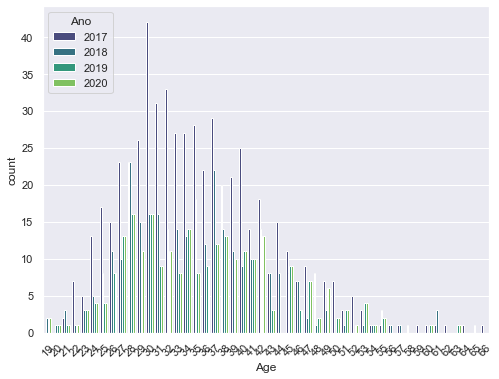

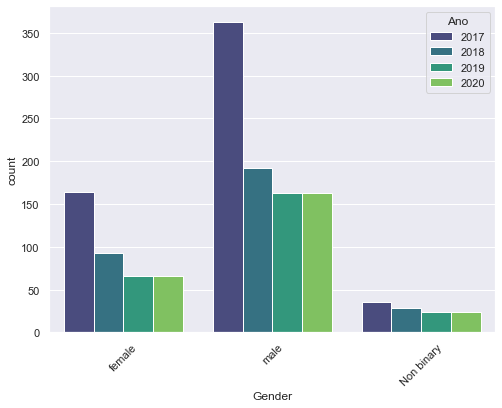

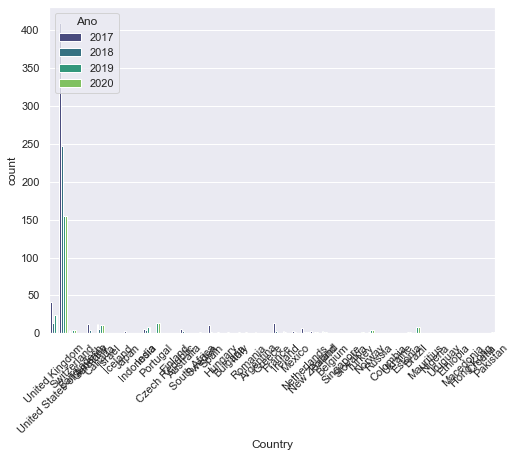

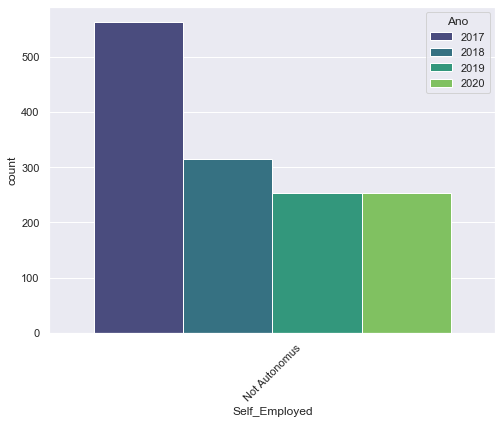

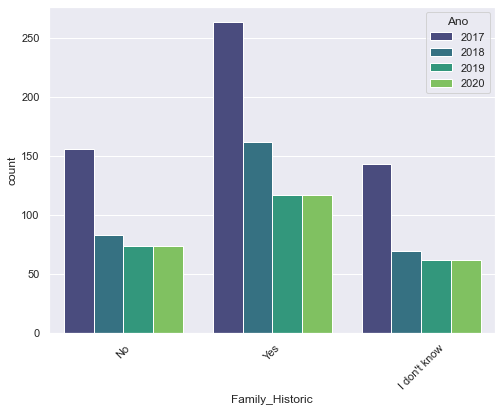

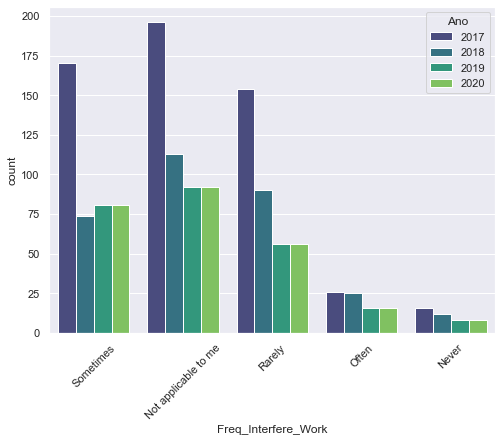

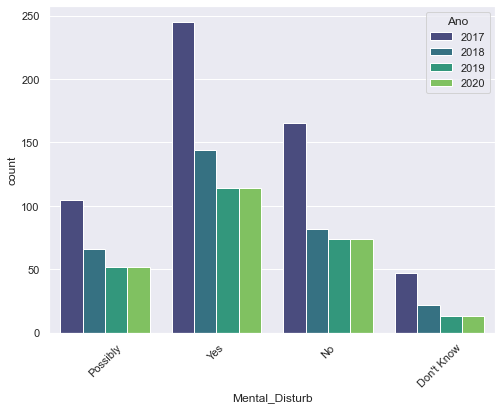

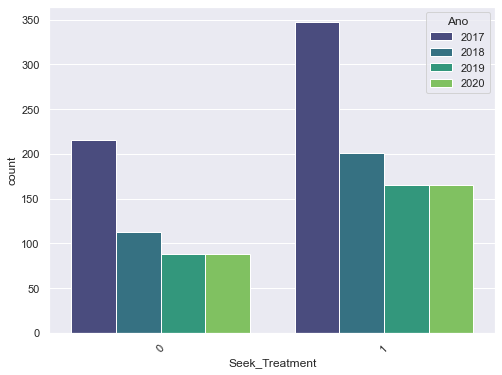

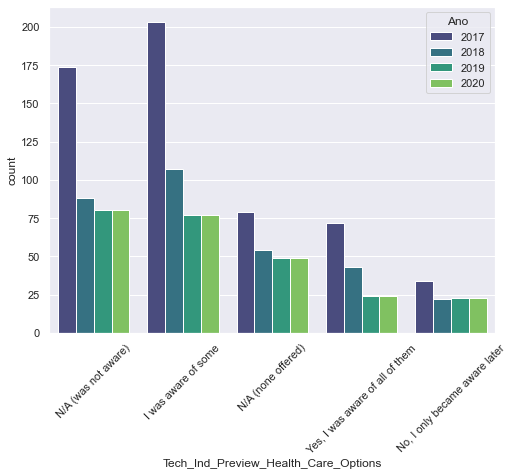

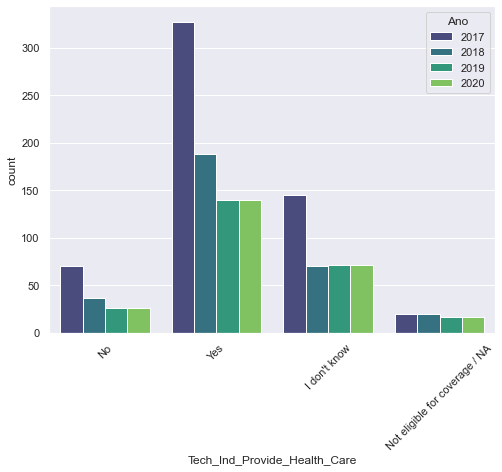

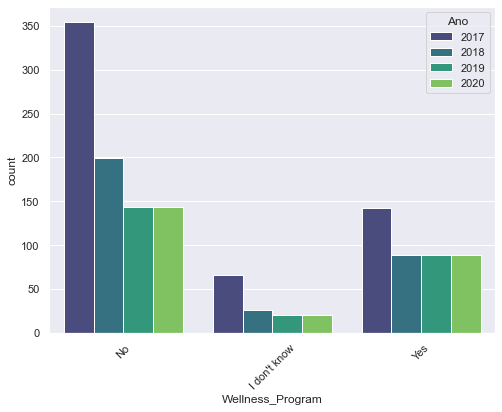

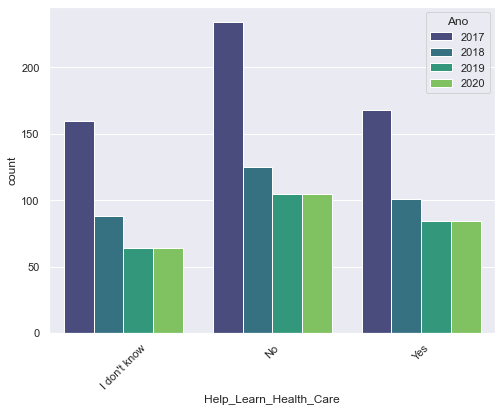

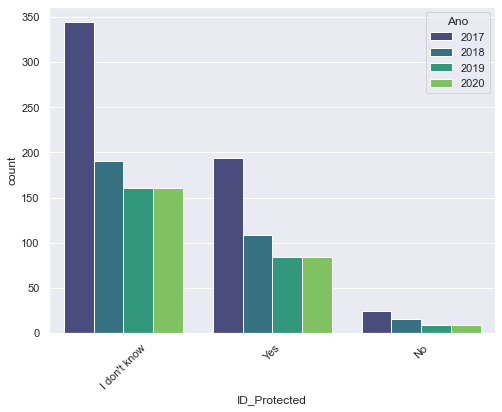

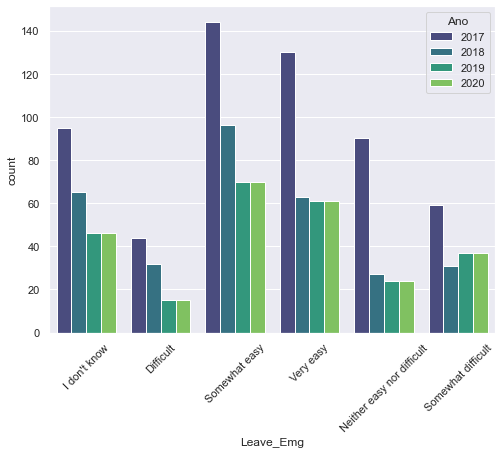

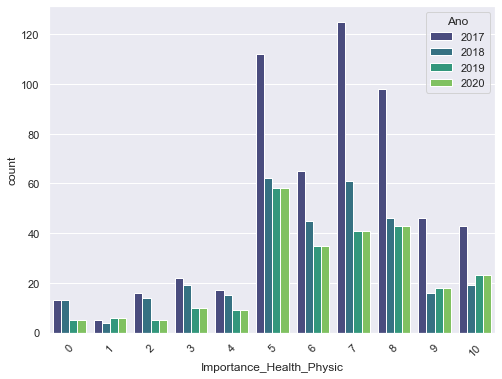

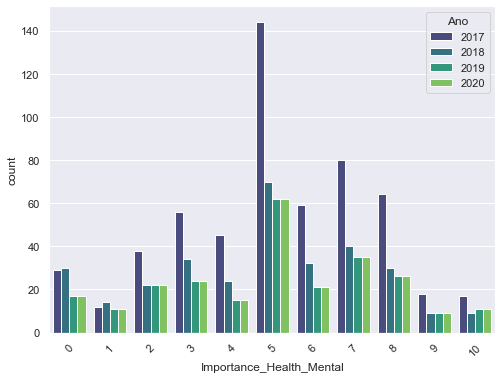

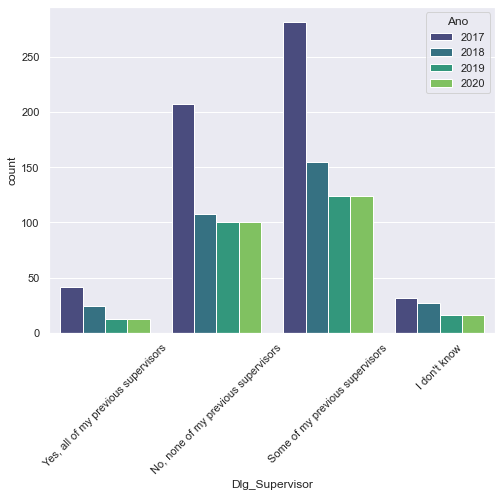

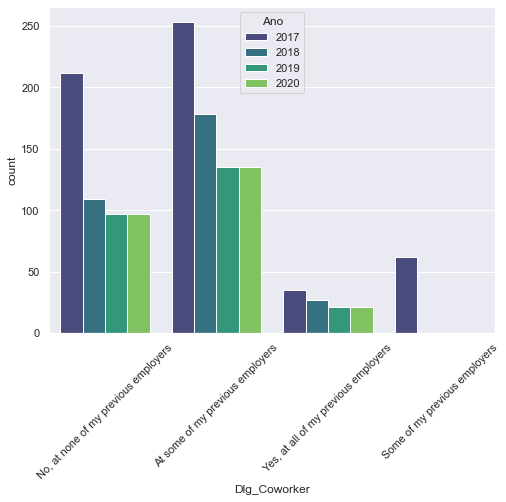

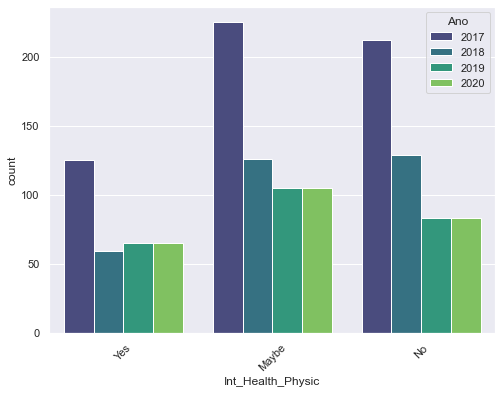

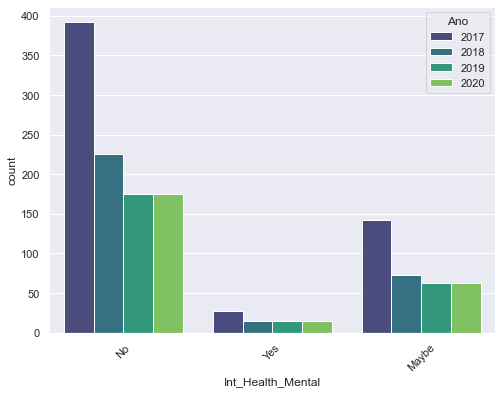

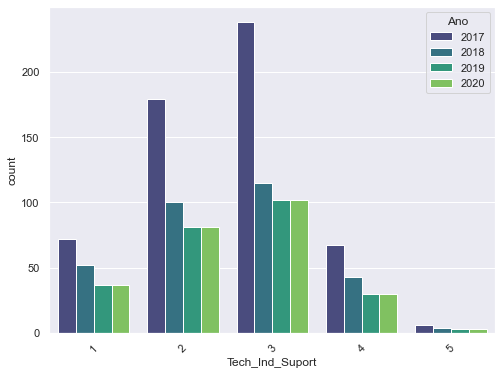

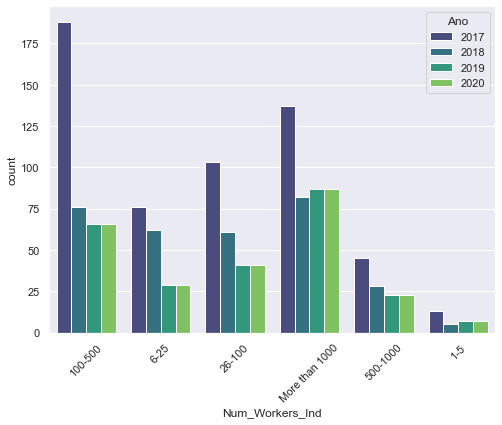

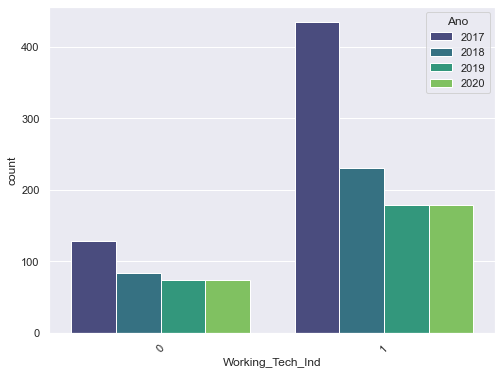

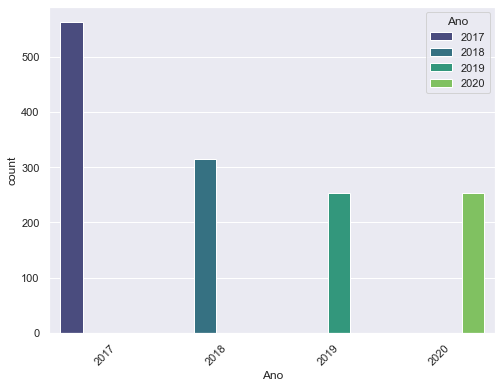

In [55]:
# Rodando nossas features para identificar possíveis correlações

features_1 = ['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options', 'Tech_Ind_Provide_Health_Care',
       'Wellness_Program', 'Help_Learn_Health_Care', 'ID_Protected',
       'Leave_Emg', 'Importance_Health_Physic', 'Importance_Health_Mental',
       'Dlg_Supervisor', 'Dlg_Coworker', 'Int_Health_Physic',
       'Int_Health_Mental', 'Tech_Ind_Suport', 'Num_Workers_Ind',
       'Working_Tech_Ind', 'Ano']

for f in features_1:
    sns.countplot(x = f, data = df, palette = 'viridis', hue = 'Ano')
    plt.xticks(rotation=45)
    plt.show()

**Transformando as variáveis categóricas em Dummyes**

In [56]:
print(df.shape)

# Manter somente as colunas realmente relevantes Eliminar a coluna Country, e Ano por enquanto para não atrapalhar a análise
features_2 = ['Age', 'Gender', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options', 'Tech_Ind_Provide_Health_Care',
       'Wellness_Program', 'Help_Learn_Health_Care', 'ID_Protected',
       'Leave_Emg', 'Importance_Health_Physic', 'Importance_Health_Mental',
       'Dlg_Supervisor', 'Dlg_Coworker', 'Int_Health_Physic',
       'Int_Health_Mental', 'Tech_Ind_Suport', 'Num_Workers_Ind',
       'Working_Tech_Ind']

print(df_dummy.shape)
df_dummy = df[features_2]

(1382, 24)
(240, 51)


**Para melhorar ainda mais os resultados do cluster, irei transformar a variável idade em categórica e a nota das industrias em relação a assistencia para o distúrbio mental, conforme a seguir:**

In [57]:
# Transformando a coluna Age
# Coluna year para representar a idade categoricamente
df_dummy['Year'] = 0
df_dummy['Year'][(df_dummy['Age'] < 25)] = 'Young'
df_dummy['Year'][(df_dummy['Age'] >= 25) & (df_dummy['Age'] <= 55)] = 'Adult'
df_dummy['Year'][(df_dummy['Age'] > 55)] = 'Old'

# Transformando a coluna Tech_Ind_Suport
# Nota das industrias em relação a assistência a saúde mental
df_dummy['Grate'] = 0
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] < 3)] = 'Low'
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] == 3)] = 'Mid'
df_dummy['Grate'][(df_dummy['Tech_Ind_Suport'] > 3)] = 'High'

# Transformando a coluna Importance_Health_Mental
# Nota das industrias em relação a importancia dada a saúde mental
df_dummy['Grate_Mental'] = 0
df_dummy['Grate_Mental'][(df_dummy['Importance_Health_Mental'] < 5)] = 'Low'
df_dummy['Grate_Mental'][(df_dummy['Importance_Health_Mental'] >= 5) & (df_dummy['Importance_Health_Mental'] <= 7)] = 'Mid'
df_dummy['Grate_Mental'][(df_dummy['Importance_Health_Mental'] > 7)] = 'High'

# Transformando a coluna Importance_Health_Physic
# Nota das industrias em relação a importancia dada a saúde física
df_dummy['Grate_Physic'] = 0
df_dummy['Grate_Physic'][(df_dummy['Importance_Health_Physic'] < 5)] = 'Low'
df_dummy['Grate_Physic'][(df_dummy['Importance_Health_Physic'] >= 5) & (df_dummy['Importance_Health_Physic'] <= 7)] = 'Mid'
df_dummy['Grate_Physic'][(df_dummy['Importance_Health_Physic'] > 7)] = 'High'


print(df_dummy.shape)
df_dummy

<ipython-input-57-b22b4b8da860>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Year'] = 0
<ipython-input-57-b22b4b8da860>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Year'][(df_dummy['Age'] < 25)] = 'Young'
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=

(1382, 26)


Age      Gender  Self_Employed Family_Historic   Freq_Interfere_Work  \
0      27      female  Not Autonomus              No             Sometimes   
1      31        male  Not Autonomus              No  Not applicable to me   
2      36        male  Not Autonomus             Yes             Sometimes   
4      30        male  Not Autonomus             Yes                Rarely   
5      36      female  Not Autonomus             Yes                Rarely   
6      38      female  Not Autonomus             Yes  Not applicable to me   
7      35        male  Not Autonomus    I don't know  Not applicable to me   
8      40        male  Not Autonomus             Yes                 Often   
9      35        male  Not Autonomus             Yes             Sometimes   
11     22      female  Not Autonomus    I don't know             Sometimes   
12     34      female  Not Autonomus             Yes             Sometimes   
13     28        male  Not Autonomus              No                Rarely   
14     38        male  Not Autonomus              No                 Never   
15     21        male  Not Autonomus              No                Rarely   
17     22        male  Not Autonomus             Yes             Sometimes   
21     40        male  Not Autonomus    I don't know  Not applicable to me   
22     33        male  Not Autonomus             Yes  Not applicable to me   
23     66      female  Not Autonomus             Yes             Sometimes   
24     31      female  Not Autonomus             Yes                Rarely   
25     32        male  Not Autonomus             Yes                Rarely   
26     30      female  Not Autonomus             Yes                Rarely   
27     31        male  Not Autonomus    I don't know                Rarely   
28     46        male  Not Autonomus             Yes             Sometimes   
29     28      female  Not Autonomus             Yes             Sometimes   
30     34      female  Not Autonomus    I don't know                Rarely   
31     25        male  Not Autonomus    I don't know                Rarely   
32     35        male  Not Autonomus    I don't know             Sometimes   
33     40        male  Not Autonomus              No                Rarely   
34     32        male  Not Autonomus    I don't know  Not applicable to me   
35     39        male  Not Autonomus             Yes                Rarely   
36     33        male  Not Autonomus             Yes                 Never   
37     40        male  Not Autonomus    I don't know                 Often   
38     42        male  Not Autonomus    I don't know                Rarely   
39     32        male  Not Autonomus             Yes             Sometimes   
40     27      female  Not Autonomus    I don't know             Sometimes   
41     30      female  Not Autonomus    I don't know                 Often   
42     39        male  Not Autonomus             Yes             Sometimes   
43     42      female  Not Autonomus             Yes             Sometimes   
44     37  Non binary  Not Autonomus             Yes                 Often   
45     38      female  Not Autonomus             Yes             Sometimes   
46     47        male  Not Autonomus              No  Not applicable to me   
47     64        male  Not Autonomus              No                Rarely   
48     28        male  Not Autonomus             Yes             Sometimes   
49     37        male  Not Autonomus              No  Not applicable to me   
50     30      female  Not Autonomus             Yes             Sometimes   
51     25        male  Not Autonomus              No  Not applicable to me   
52     25      female  Not Autonomus             Yes                 Often   
53     61        male  Not Autonomus    I don't know                Rarely   
54     26        male  Not Autonomus              No  Not applicable to me   
55     44      female  Not Autonomus             Yes             Sometimes   
57     26      female  Not A

In [58]:
# Variáveis numéricas removidas da dammy
features_3 = ['Grate', 'Year','Gender', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment','Grate_Physic',
       'Tech_Ind_Preview_Health_Care_Options', 'Tech_Ind_Provide_Health_Care',
       'Wellness_Program', 'Help_Learn_Health_Care', 'ID_Protected','Grate_Mental',
       'Leave_Emg','Dlg_Supervisor', 'Dlg_Coworker', 'Int_Health_Physic',
       'Int_Health_Mental', 'Num_Workers_Ind','Working_Tech_Ind']

df_dummy = df_dummy[features_3]

# Making categorical variables into numeric representation
df_dummy = pd.get_dummies(df_dummy, columns = features_3)

# print the shape
print(df_dummy.shape)

df_dummy.head()

(1382, 76)


Grate_High  Grate_Low  Grate_Mid  Year_Adult  Year_Old  Year_Young  \
0           0          1          0           1         0           0   
1           0          1          0           1         0           0   
2           0          1          0           1         0           0   
4           0          1          0           1         0           0   
5           0          1          0           1         0           0   

   Gender_Non binary  Gender_female  Gender_male  Self_Employed_Not Autonomus  \
0                  0              1            0                            1   
1                  0              0            1                            1   
2                  0              0            1                            1   
4                  0              0            1                            1   
5                  0              1            0                            1   

   Family_Historic_I don't know  Family_Historic_No  Family_Historic_Yes  \
0                             0                   1                    0   
1                             0                   1                    0   
2                             0                   0                    1   
4                             0                   0                    1   
5                             0                   0                    1   

   Freq_Interfere_Work_Never  Freq_Interfere_Work_Not applicable to me  \
0                          0                                         0   
1                          0                                         1   
2                          0                                         0   
4                          0                                         0   
5                          0                                         0   

   Freq_Interfere_Work_Often  Freq_Interfere_Work_Rarely  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
4                          0                           1   
5                          0                           1   

   Freq_Interfere_Work_Sometimes  Mental_Disturb_Don't Know  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
4                              0                          0   
5                              0                          0   

   Mental_Disturb_No  Mental_Disturb_Possibly  Mental_Disturb_Yes  \
0                  0                        1                   0   
1                  0                        1                   0   
2                  0                        0                   1   
4                  1                        0                   0   
5                  0                        0                   1   

   Seek_Treatment_0  Seek_Treatment_1  Grate_Physic_High  Grate_Physic_Low  \
0                 0                 1                  0                 0   
1                 1                 0                  0                 0   
2                 0                 1                  0                 1   
4                 1                 0                  1                 0   
5                 0                 1                  1                 0   

   Grate_Physic_Mid  Tech_Ind_Preview_Health_Care_Options_I was aware of some  \
0                 1                                                  0          
1                 1                                                  1          
2                 0                                                  0          
4                 0                                                  1          
5                 0                                                  1          

   Tech_Ind_Preview_Health_Care_Options_N/A (none offered)  \
0 

**K-means Clustering**

In [59]:
X_train = df_dummy.values

# Vamos iniciar com 3 clusters

kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_train)

# Printar os clusters para cada observação
print("The clusters are: ", kmeans.labels_)

# Printar a inércia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [1 0 1 ... 0 0 2]
The Inertia is:  15012.70940320642


In [60]:
kmeans.labels_.shape

(1382,)

In [61]:
# Encontrando o melhor número de Ks?

# Rodando K-means para multiplos números de Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

A inércia para : 2 Clusters é de: 15654.55991793261
A inércia para : 3 Clusters é de: 15012.70940320642
A inércia para : 4 Clusters é de: 14638.365345640057
A inércia para : 5 Clusters é de: 14309.667464140406
A inércia para : 6 Clusters é de: 14051.854721550533
A inércia para : 7 Clusters é de: 13814.496853222
A inércia para : 8 Clusters é de: 13646.656137247553
A inércia para : 9 Clusters é de: 13502.592592043457
A inércia para : 10 Clusters é de: 13376.293416859784
A inércia para : 11 Clusters é de: 13253.073636828572
A inércia para : 12 Clusters é de: 13150.740769623919
A inércia para : 13 Clusters é de: 13058.669777660507
A inércia para : 14 Clusters é de: 12934.032870406583
A inércia para : 15 Clusters é de: 12840.302654764419
A inércia para : 16 Clusters é de: 12790.21017991538
A inércia para : 17 Clusters é de: 12663.625028505801
A inércia para : 18 Clusters é de: 12622.934500280218
A inércia para : 19 Clusters é de: 12578.499131254988


In [62]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inércia por Ks')

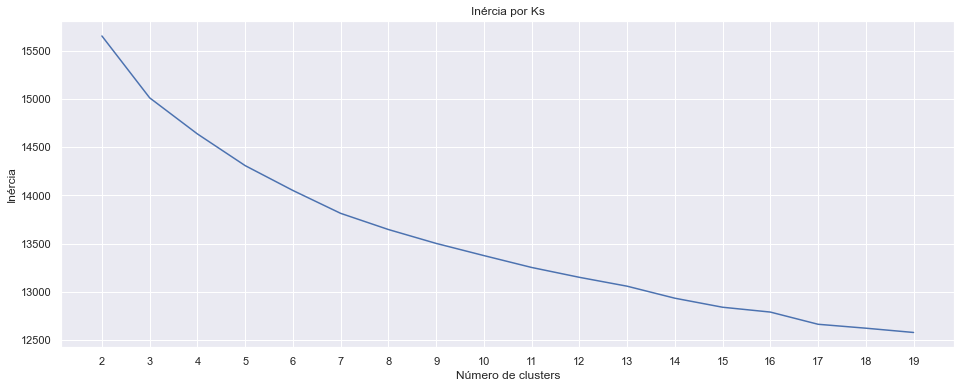

In [63]:
# Plotando o gráfico de Elbow para auxílio na escolha do número de Ks
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

In [64]:
# Rodando K means para 3 clusters

kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predições" para os dados
predictions = kmeans.predict(X_train)

# Calculando contagens dos clusters
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Criando um dataframe
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2
0        460        514        408

In [65]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 2])

In [66]:
predictions

array([1, 0, 1, ..., 0, 0, 2])

In [67]:
df_dummy.shape

(1382, 76)

**Running Principal Component Analysis (PCA) to Visualize & improve results**

Explicação da variância nos 2 primeiros componentes: [0.094051 0.075719]
A porcentagem total da variância explicada pelos dois componentes: 0.1697699171654699


<Figure size 576x432 with 0 Axes>

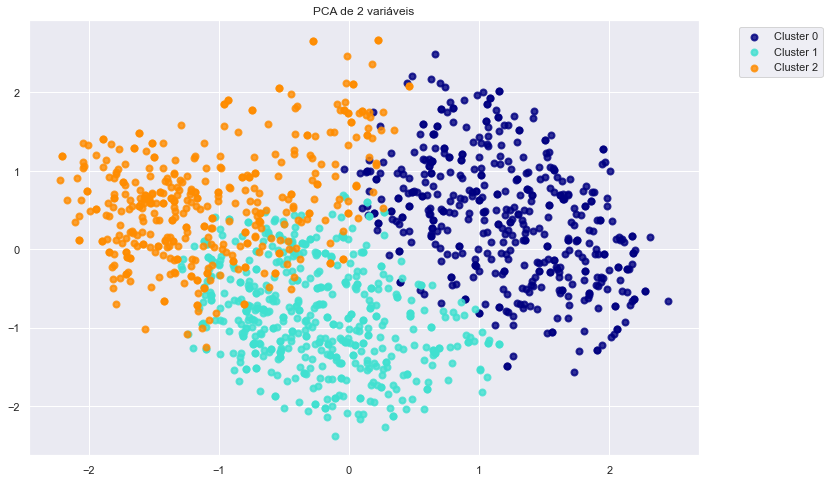

In [68]:
# Rodando a PCA

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

# Vamos pedir 2 componentes pois queremos plotar um gráfico cartesiano x,y.
pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Porcentagem da variação explicada pelos 2 componentes principais
print('Explicação da variância nos 2 primeiros componentes: %s' % str(pca.explained_variance_ratio_))
print('A porcentagem total da variância explicada pelos dois componentes: %s' % sum(pca.explained_variance_ratio_))

# Pltando os dados
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA de 2 variáveis')
plt.show()

**Identificando o melhor número de componentes**

A variância total do dataset é:  12.228201422866254
A porcentagem de 95% da variância que queremos é:  11.616791351722942

Variância explicada através de 15 componentes:  7.354924355921307
Variância explicada através de 17 componentes:  7.88016947165336
Variância explicada através de 20 componentes:  8.58482544267352
Variância explicada através de 25 componentes:  9.55716254362484
Variância explicada através de 30 componentes:  10.32906175321409
Variância explicada através de 35 componentes:  10.950478685024331
Variância explicada através de 40 componentes:  11.456487873509538
Variância explicada através de 42 componentes:  11.624945212951387
Variância explicada através de 45 componentes:  11.840775915341961


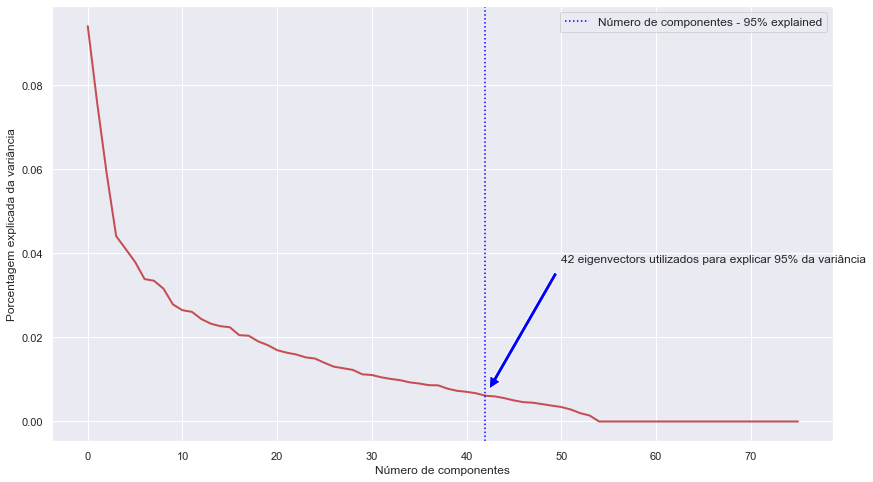

In [69]:
# Redução dimensional e posteriormente K-means

n_components = X.shape[1]

# Rodando a PCA com todos os componentes
pca = PCA(n_components=n_components, random_state = 500)
X_r = pca.fit(X).transform(X)


# Calculando o 95% da variância
total_variance = sum(pca.explained_variance_)
print("A variância total do dataset é: ", total_variance)
var_95 = total_variance * 0.95
print("A porcentagem de 95% da variância que queremos é: ", var_95)
print("")

# Criando o dataframe com os componentes e explicando a variância
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Variância Explicada"])

# Tentando atingir 95% de explicação da variância
print("Variância explicada através de 15 componentes: ", sum(a["Variância Explicada"][0:15]))
print("Variância explicada através de 17 componentes: ", sum(a["Variância Explicada"][0:17]))
print("Variância explicada através de 20 componentes: ", sum(a["Variância Explicada"][0:20]))
print("Variância explicada através de 25 componentes: ", sum(a["Variância Explicada"][0:25]))
print("Variância explicada através de 30 componentes: ", sum(a["Variância Explicada"][0:30]))
print("Variância explicada através de 35 componentes: ", sum(a["Variância Explicada"][0:35]))
print("Variância explicada através de 40 componentes: ", sum(a["Variância Explicada"][0:40]))
print("Variância explicada através de 42 componentes: ", sum(a["Variância Explicada"][0:42]))
print("Variância explicada através de 45 componentes: ", sum(a["Variância Explicada"][0:45]))

# Plotando os dados
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('Número de componentes')
plt.ylabel('Porcentagem explicada da variância')

# Plotando linha referência para 95% e.v.
plt.axvline(42,linestyle=':', label='Número de componentes - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adicionando um vetor explicativo
plt.annotate('42 eigenvectors utilizados para explicar 95% da variância', xy=(42, pca.explained_variance_ratio_[42]), 
             xytext=(50, pca.explained_variance_ratio_[5]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

A inércia para : 2 Clusters é de: 14821.673363971584
A inércia para : 3 Clusters é de: 14180.218040438027
A inércia para : 4 Clusters é de: 13797.768062924646
A inércia para : 5 Clusters é de: 13475.288392075408
A inércia para : 6 Clusters é de: 13225.625228889941
A inércia para : 7 Clusters é de: 12984.12018526852
A inércia para : 8 Clusters é de: 12831.2350239184
A inércia para : 9 Clusters é de: 12667.164448311794
A inércia para : 10 Clusters é de: 12526.820672244077
A inércia para : 11 Clusters é de: 12422.15603899618
A inércia para : 12 Clusters é de: 12314.739601112971
A inércia para : 13 Clusters é de: 12195.845237213554
A inércia para : 14 Clusters é de: 12113.86974679946
A inércia para : 15 Clusters é de: 12037.364554035445
A inércia para : 16 Clusters é de: 11987.291401361821
A inércia para : 17 Clusters é de: 11873.517577197696
A inércia para : 18 Clusters é de: 11807.8259739577
A inércia para : 19 Clusters é de: 11729.082418076165


Text(0.5, 1.0, 'Inércia por Ks')

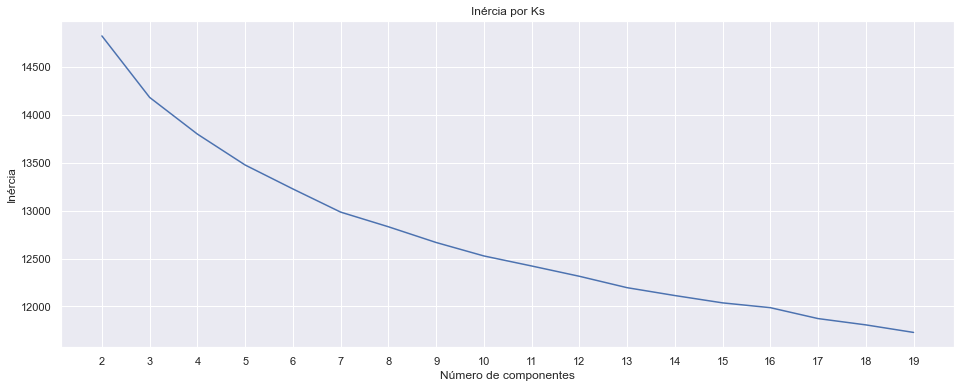

In [70]:
# Rodando a PCA com o valor ótimo

pca = PCA(n_components=42, random_state = 500)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

# Gerando o gráfico de Elbow para as inércias identificadas
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, conseguimos reduzir no inércia de **15012.70** para **14180.21!**

**Para melhorar ainda mais nosso resultado, vamos combinar/agrupar observações que sejam semelhantes**

In [71]:
# Removendo caracteres indesejados
df_dummy.columns = df_dummy.columns.str.replace("'","")
df_dummy.columns = df_dummy.columns.str.replace("(","")
df_dummy.columns = df_dummy.columns.str.replace(")","")
df_dummy.columns = df_dummy.columns.str.replace("/","")

df_dummy.columns

<ipython-input-71-ca70d33a1509>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dummy.columns = df_dummy.columns.str.replace("(","")
<ipython-input-71-ca70d33a1509>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dummy.columns = df_dummy.columns.str.replace(")","")


Index(['Grate_High', 'Grate_Low', 'Grate_Mid', 'Year_Adult', 'Year_Old',
       'Year_Young', 'Gender_Non binary', 'Gender_female', 'Gender_male',
       'Self_Employed_Not Autonomus', 'Family_Historic_I dont know',
       'Family_Historic_No', 'Family_Historic_Yes',
       'Freq_Interfere_Work_Never', 'Freq_Interfere_Work_Not applicable to me',
       'Freq_Interfere_Work_Often', 'Freq_Interfere_Work_Rarely',
       'Freq_Interfere_Work_Sometimes', 'Mental_Disturb_Dont Know',
       'Mental_Disturb_No', 'Mental_Disturb_Possibly', 'Mental_Disturb_Yes',
       'Seek_Treatment_0', 'Seek_Treatment_1', 'Grate_Physic_High',
       'Grate_Physic_Low', 'Grate_Physic_Mid',
       'Tech_Ind_Preview_Health_Care_Options_I was aware of some',
       'Tech_Ind_Preview_Health_Care_Options_NA none offered',
       'Tech_Ind_Preview_Health_Care_Options_NA was not aware',
       'Tech_Ind_Preview_Health_Care_Options_No, I only became aware later',
       'Tech_Ind_Preview_Health_Care_Options_Yes, I was

In [72]:
# Limpeza/Combinação de variáveis para melhorar os resultados 

print("The shape is: ", df_dummy.shape)


# Limpando a coluna Tech_Ind_Preview_Health_Care_Options

# I was aware of some e Yes, I was aware of all of them
df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'] = 0
df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'][
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_I was aware of some'] == 1) | 
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_Yes, I was aware of all of them'] == 1)] = 1

# N/A was not aware e No, I only became aware later
df_dummy['Tech_Ind_Preview_Health_Care_Options_Not_Aware'] = 0
df_dummy['Tech_Ind_Preview_Health_Care_Options_Not_Aware'][
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_NA was not aware'] == 1) |
            (df_dummy['Tech_Ind_Preview_Health_Care_Options_No, I only became aware later'] == 1)] = 1

# Limpando a coluna Tech_Ind_Provide_Health_Care

# Not eligible for coverage / NA e No
df_dummy['Tech_Ind_Provide_Health_Care_Not'] = 0
df_dummy['Tech_Ind_Provide_Health_Care_Not'][
            (df_dummy['Tech_Ind_Provide_Health_Care_Not eligible for coverage  NA'] == 1) | 
            (df_dummy['Tech_Ind_Provide_Health_Care_No'] == 1)] = 1


#Limpando a coluna Leave_Emg

# Somewhat difficult e Difficult
df_dummy['Leave_Emg_Hard'] = 0
df_dummy['Leave_Emg_Hard'][
            (df_dummy['Leave_Emg_Somewhat difficult'] == 1) | (df_dummy['Leave_Emg_Difficult'] == 1)] = 1

# Somewhat easy e Very Easy
df_dummy['Leave_Emg_Soft'] = 0
df_dummy['Leave_Emg_Soft'][
            (df_dummy['Leave_Emg_Somewhat easy'] == 1) | (df_dummy['Leave_Emg_Very easy'] == 1)] = 1

# I don't know e Neither easy nor difficult
df_dummy['Leave_Emg_Regular'] = 0
df_dummy['Leave_Emg_Regular'][
            (df_dummy['Leave_Emg_I dont know'] == 1) | (df_dummy['Leave_Emg_Neither easy nor difficult'] == 1)] = 1

<ipython-input-72-ccd79aba51e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Tech_Ind_Preview_Health_Care_Options_Aware'][


The shape is:  (1382, 76)


<ipython-input-72-ccd79aba51e5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Tech_Ind_Preview_Health_Care_Options_Not_Aware'][
<ipython-input-72-ccd79aba51e5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Tech_Ind_Provide_Health_Care_Not'][
<ipython-input-72-ccd79aba51e5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['Leave_Emg_Hard'][
<ipython-input-72-ccd79aba51e5>:38: SettingWithCopyWarning:

In [73]:
features_Optimus = ['Year_Young','Year_Adult','Year_Old', 
                    'Gender_Non binary',
                    'Gender_female',
                    'Gender_male',
                    'Self_Employed_Not Autonomus',
                    'Family_Historic_I dont know',
                    'Family_Historic_No',
                    'Family_Historic_Yes',
                    'Freq_Interfere_Work_Never',
                    'Freq_Interfere_Work_Not applicable to me',
                    'Freq_Interfere_Work_Often',
                    'Freq_Interfere_Work_Rarely',
                    'Freq_Interfere_Work_Sometimes',
                    'Mental_Disturb_Dont Know',
                    'Mental_Disturb_Possibly',
                    'Mental_Disturb_No',
                    'Mental_Disturb_Yes',
                    'Seek_Treatment_0',
                    'Seek_Treatment_1',
                    'Tech_Ind_Preview_Health_Care_Options_Aware',
                    'Tech_Ind_Preview_Health_Care_Options_Not_Aware',
                    'Tech_Ind_Provide_Health_Care_Not',
                    'Wellness_Program_I dont know',
                    'Wellness_Program_No',
                    'Wellness_Program_Yes',
                    'Help_Learn_Health_Care_I dont know',
                    'Help_Learn_Health_Care_No',
                    'Help_Learn_Health_Care_Yes',
                    'ID_Protected_I dont know',
                    'ID_Protected_No',
                    'ID_Protected_Yes',
                    'Leave_Emg_Hard',
                    'Leave_Emg_Regular',
                    'Leave_Emg_Soft',
                    'Dlg_Supervisor_I dont know',
                    'Dlg_Supervisor_No, none of my previous supervisors',
                    'Dlg_Supervisor_Some of my previous supervisors',
                    'Dlg_Supervisor_Yes, all of my previous supervisors',
                    'Dlg_Coworker_At some of my previous employers',
                    'Dlg_Coworker_No, at none of my previous employers',
                    'Dlg_Coworker_Some of my previous employers',
                    'Dlg_Coworker_Yes, at all of my previous employers',
                    'Int_Health_Physic_Maybe',
                    'Int_Health_Physic_No',
                    'Int_Health_Physic_Yes',
                    'Int_Health_Mental_Maybe',
                    'Int_Health_Mental_No',
                    'Int_Health_Mental_Yes',
                    'Num_Workers_Ind_1-5',
                    'Num_Workers_Ind_100-500',
                    'Num_Workers_Ind_26-100',
                    'Num_Workers_Ind_500-1000',
                    'Num_Workers_Ind_6-25',
                    'Num_Workers_Ind_More than 1000',
                    'Working_Tech_Ind_0',
                    'Working_Tech_Ind_1',
                    'Grate_Low','Grate_High','Grate_Mid',
                    'Grate_Mental_Low','Grate_Mental_High','Grate_Mental_Mid',
                    'Grate_Physic_Low','Grate_Physic_High','Grate_Physic_Mid']

A inércia para : 2 Clusters é de: 14443.298157848774
A inércia para : 3 Clusters é de: 13822.706115954263
A inércia para : 4 Clusters é de: 13443.425684980952
A inércia para : 5 Clusters é de: 13127.213453971857
A inércia para : 6 Clusters é de: 12876.952030473565
A inércia para : 7 Clusters é de: 12651.5182365031
A inércia para : 8 Clusters é de: 12462.029529451345
A inércia para : 9 Clusters é de: 12307.768750227393
A inércia para : 10 Clusters é de: 12184.87397964653
A inércia para : 11 Clusters é de: 12063.007719195977
A inércia para : 12 Clusters é de: 11967.948232511524
A inércia para : 13 Clusters é de: 11879.270603472167
A inércia para : 14 Clusters é de: 11763.540818109404
A inércia para : 15 Clusters é de: 11648.505723699178
A inércia para : 16 Clusters é de: 11588.504560322568
A inércia para : 17 Clusters é de: 11538.868106179902
A inércia para : 18 Clusters é de: 11425.852953594775
A inércia para : 19 Clusters é de: 11382.785918963273
A inércia para : 20 Clusters é de: 1131

Text(0.5, 1.0, 'Inércia por Ks')

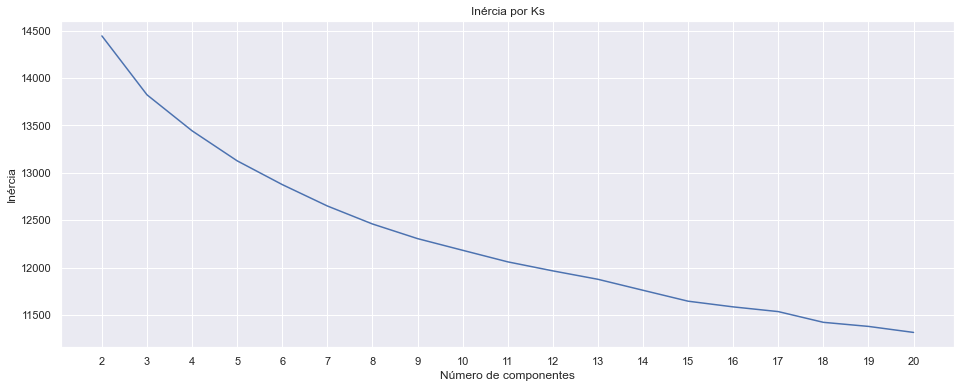

In [74]:
# Rodando novamente o K-means com as variáveis combinadas

X_train = df_dummy[features_Optimus].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, conseguimos reduzir no inércia de **14180.21** para **13822.70!**

Explicação da variância nos 2 primeiros componentes: [0.096146 0.083350]
A porcentagem total da variância explicada pelos dois componentes: 0.17949625790409368


<Figure size 576x432 with 0 Axes>

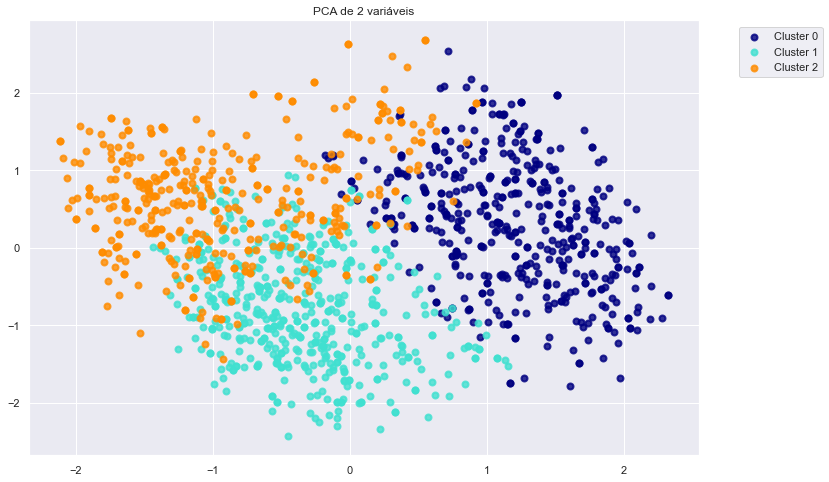

In [75]:
#Rodando a PCA no dataset otimizado

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

# Vamos pedir 2 componentes pois queremos plotar um gráfico cartesiano x,y.
pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Porcentagem da variação explicada pelos 2 componentes principais
print('Explicação da variância nos 2 primeiros componentes: %s' % str(pca.explained_variance_ratio_))
print('A porcentagem total da variância explicada pelos dois componentes: %s' % sum(pca.explained_variance_ratio_))

# Pltando os dados
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA de 2 variáveis')
plt.show()

A variância total do dataset é:  11.32913658698628
A porcentagem de 95% da variância que queremos é:  10.762679757636965

Variância explicada através de 10 componentes:  5.8216229499060095
Variância explicada através de 15 componentes:  7.364319819479863
Variância explicada através de 20 componentes:  8.56897956128896
Variância explicada através de 25 componentes:  9.482675679108123
Variância explicada através de 30 componentes:  10.177985711956142
Variância explicada através de 36 componentes:  10.782888618746242
Variância explicada através de 40 componentes:  11.054445855970243


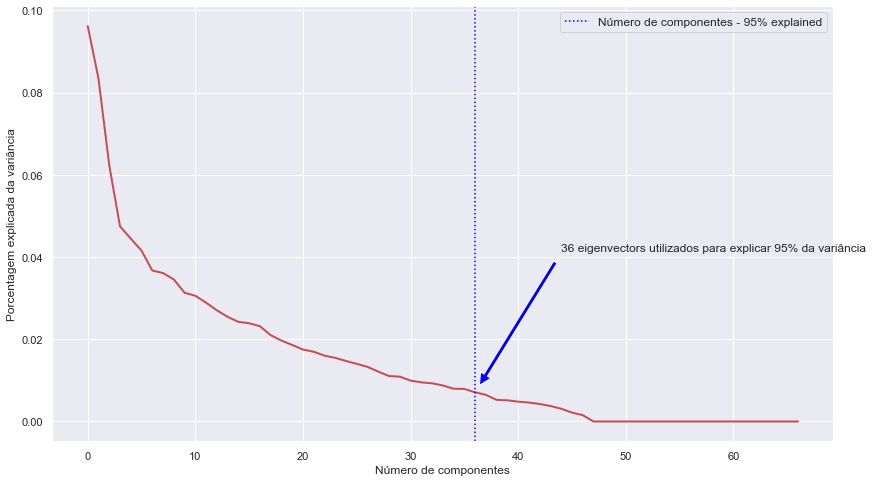

In [76]:
# Redução dimensional e posteriormente K-means no dataset otimizado

n_components = X.shape[1]

# Rodando a PCA com todos os componentes
pca = PCA(n_components=n_components, random_state = 500)
X_r = pca.fit(X).transform(X)


# Calculando o 95% da variância
total_variance = sum(pca.explained_variance_)
print("A variância total do dataset é: ", total_variance)
var_95 = total_variance * 0.95
print("A porcentagem de 95% da variância que queremos é: ", var_95)
print("")

# Criando o dataframe com os componentes e explicando a variância
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Variância Explicada"])

# Tentando atingir 95% de explicação da variância
print("Variância explicada através de 10 componentes: ", sum(a["Variância Explicada"][0:10]))
print("Variância explicada através de 15 componentes: ", sum(a["Variância Explicada"][0:15]))
print("Variância explicada através de 20 componentes: ", sum(a["Variância Explicada"][0:20]))
print("Variância explicada através de 25 componentes: ", sum(a["Variância Explicada"][0:25]))
print("Variância explicada através de 30 componentes: ", sum(a["Variância Explicada"][0:30]))
print("Variância explicada através de 36 componentes: ", sum(a["Variância Explicada"][0:36]))
print("Variância explicada através de 40 componentes: ", sum(a["Variância Explicada"][0:40]))


# Plotando os dados
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('Número de componentes')
plt.ylabel('Porcentagem explicada da variância')

# Plotando linha referência para 95% e.v.
plt.axvline(36,linestyle=':', label='Número de componentes - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adicionando um vetor explicativo
plt.annotate('36 eigenvectors utilizados para explicar 95% da variância', xy=(36, pca.explained_variance_ratio_[36]), 
             xytext=(44, pca.explained_variance_ratio_[5]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

A inércia para : 2 Clusters é de: 13689.087498151388
A inércia para : 3 Clusters é de: 13068.73645442129
A inércia para : 4 Clusters é de: 12696.903755261214
A inércia para : 5 Clusters é de: 12373.145088196305
A inércia para : 6 Clusters é de: 12118.625054316513
A inércia para : 7 Clusters é de: 11890.788029925949
A inércia para : 8 Clusters é de: 11719.38006605852
A inércia para : 9 Clusters é de: 11571.520192281656
A inércia para : 10 Clusters é de: 11428.978341449352
A inércia para : 11 Clusters é de: 11316.281671289747
A inércia para : 12 Clusters é de: 11207.223305654343
A inércia para : 13 Clusters é de: 11112.10231865108
A inércia para : 14 Clusters é de: 11036.043176458785
A inércia para : 15 Clusters é de: 10937.289890071317
A inércia para : 16 Clusters é de: 10858.909185650993
A inércia para : 17 Clusters é de: 10755.447940415805
A inércia para : 18 Clusters é de: 10711.787571030896
A inércia para : 19 Clusters é de: 10651.544592325012
A inércia para : 20 Clusters é de: 1055

Text(0.5, 1.0, 'Inércia por Ks')

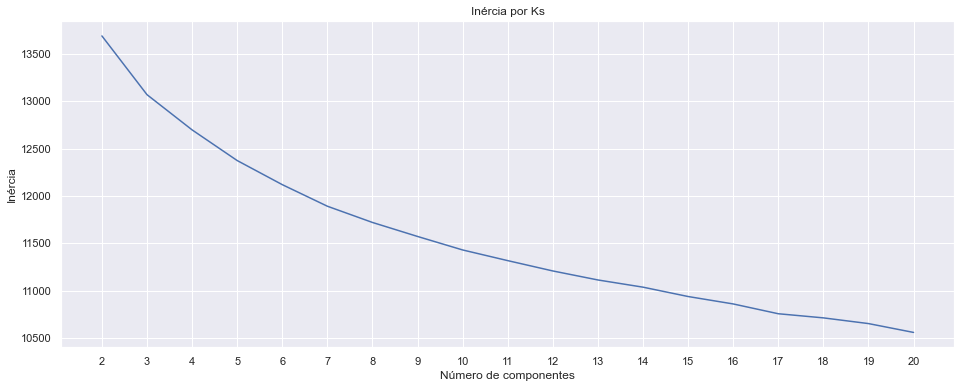

In [77]:
# Rodando a PCA com o valor ótimo de eignvector no dataset otimizado

pca = PCA(n_components=36, random_state = 500)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=500)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("A inércia para :", f, "Clusters é de:", u)

# Gerando o gráfico de Elbow para as inércias identificadas
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Número de componentes')
plt.ylabel('Inércia')
plt.title("Inércia por Ks")

**Resultado**:

Para **3 Ks**, conseguimos reduzir no inércia de **13822.70** para **13068.73!**

**Rodando a K-means com 3 clusters e usando a PCA com 36 componentes**

In [78]:
# Rodando PCA com 36 PC
pca = PCA(n_components=36, random_state = 500)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 3 Ks
kmeans = KMeans(n_clusters=3, random_state=500)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'


df.head(5)

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Age  Gender                   Country  Self_Employed Family_Historic  \
0   27  female            United Kingdom  Not Autonomus              No   
1   31    male            United Kingdom  Not Autonomus              No   
2   36    male  United States of America  Not Autonomus             Yes   
4   30    male  United States of America  Not Autonomus             Yes   
5   36  female  United States of America  Not Autonomus             Yes   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
0             Sometimes       Possibly               1   
1  Not applicable to me       Possibly               0   
2             Sometimes            Yes               1   
4                Rarely             No               0   
5                Rarely            Yes               1   

  Tech_Ind_Preview_Health_Care_Options Tech_Ind_Provide_Health_Care  \
0                  N/A (was not aware)                           No   
1                  I was aware of some                          Yes   
2                  N/A (was not aware)                 I don't know   
4                  I was aware of some                          Yes   
5                  I was aware of some                          Yes   

  Wellness_Program Help_Learn_Health_Care  ID_Protected      Leave_Emg  \
0               No           I don't know  I don't know   I don't know   
1               No                     No  I don't know   I don't know   
2     I don't know                     No           Yes      Difficult   
4               No           I don't know           Yes  Somewhat easy   
5               No                     No           Yes      Very easy   

   Importance_Health_Physic  Importance_Health_Mental  \
0                         6                         0   
1                         7                         2   
2                         0                         1   
4                         9                         5   
5                        10                        10   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  Yes, all of my previous supervisors  No, at none of my previous employers   
1  No, none of my previous supervisors      At some of my previous employers   
2  No, none of my previous supervisors      At some of my previous employers   
4      Some of my previous supervisors      At some of my previous employers   
5      Some of my previous supervisors      At some of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport Num_Workers_Ind  \
0               Yes                No                1         100-500   
1               Yes                No                2         100-500   
2             Maybe                No                1            6-25   
4             Maybe                No                2         100-500   
5                No                No                2            6-25   

   Working_Tech_Ind   Ano  Clusters Clusters Category  
0                 1  2017         0         Cluster 1  
1                 1  2017         2         Cluster 3  
2                 1  2017         0         Cluster 1  
4                 1  2017         2         Cluster 3  
5                 1  2017         1         Cluster 2

In [79]:
# Removendo caracteres indesejados
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")
df.columns = df.columns.str.replace("/","")

# Pegando nome das colunas para função mais abaixo
df.columns

<ipython-input-79-c929c30dc624>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(","")
<ipython-input-79-c929c30dc624>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")","")


Index(['Age', 'Gender', 'Country', 'Self_Employed', 'Family_Historic',
       'Freq_Interfere_Work', 'Mental_Disturb', 'Seek_Treatment',
       'Tech_Ind_Preview_Health_Care_Options', 'Tech_Ind_Provide_Health_Care',
       'Wellness_Program', 'Help_Learn_Health_Care', 'ID_Protected',
       'Leave_Emg', 'Importance_Health_Physic', 'Importance_Health_Mental',
       'Dlg_Supervisor', 'Dlg_Coworker', 'Int_Health_Physic',
       'Int_Health_Mental', 'Tech_Ind_Suport', 'Num_Workers_Ind',
       'Working_Tech_Ind', 'Ano', 'Clusters', 'Clusters Category'],
      dtype='object')

**Criando um ordenamento para futura visualização no BI**

In [80]:
# Gerando ordem para Family_Historic
df['Family_Historic_Order'] = 0
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'Yes'] = 1
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'I dont know'] = 2
df['Family_Historic_Order'].loc[df['Family_Historic'] == 'No'] = 3

# Gerando ordem para Freq_Interfere_Work
df['Freq_Interfere_Work_Order'] = 0
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Often'] = 1
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Sometimes'] = 2
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Rarely'] = 3
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Never'] = 4
df['Freq_Interfere_Work_Order'].loc[df['Freq_Interfere_Work'] == 'Not applicable to me'] = 5

# Gerando ordem para Mental_Disturb 
df['Mental_Disturb_Order'] = 0
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Yes'] = 1
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Possibly'] = 2
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'No'] = 3
df['Mental_Disturb_Order'].loc[df['Mental_Disturb'] == 'Dont Know'] = 4

# Gerando ordem para Tech_Ind_Preview_Health_Care_Options 
df['Tech_Ind_Preview_Health_Care_Options_Order'] = 0
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'Yes, I was aware of all of them'] = 1
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'I was aware of some'] = 2
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'No, I only became aware later'] = 3
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'NA was not aware'] = 4
df['Tech_Ind_Preview_Health_Care_Options_Order'].loc[df['Tech_Ind_Preview_Health_Care_Options'] == 'NA none offered'] = 5

# Gerando ordem para Tech_Ind_Provide_Health_Care
df['Tech_Ind_Provide_Health_Care_Order'] = 0
df['Tech_Ind_Provide_Health_Care_Order'].loc[df['Tech_Ind_Provide_Health_Care'] == 'Yes'] = 1
df['Tech_Ind_Provide_Health_Care_Order'].loc[df['Tech_Ind_Provide_Health_Care'] == 'No'] = 2
df['Tech_Ind_Provide_Health_Care_Order'].loc[df['Tech_Ind_Provide_Health_Care'] == 'I dont Know'] = 3
df['Tech_Ind_Provide_Health_Care_Order'].loc[df['Tech_Ind_Provide_Health_Care'] == 'Not eligible for coverage  NA'] = 4

# Gerando ordem para Wellness_Program
df['Wellness_Program_Order'] = 0
df['Wellness_Program_Order'].loc[df['Wellness_Program'] == 'Yes'] = 1
df['Wellness_Program_Order'].loc[df['Wellness_Program'] == 'No'] = 2
df['Wellness_Program_Order'].loc[df['Wellness_Program'] == 'I dont Know'] = 3

# Gerando ordem para Help_Learn_Health_Care
df['Help_Learn_Health_Care_Order'] = 0
df['Help_Learn_Health_Care_Order'].loc[df['Help_Learn_Health_Care'] == 'Yes'] = 1
df['Help_Learn_Health_Care_Order'].loc[df['Help_Learn_Health_Care'] == 'No'] = 2
df['Help_Learn_Health_Care_Order'].loc[df['Help_Learn_Health_Care'] == 'I dont Know'] = 3

# Gerando ordem para ID_Protected
df['ID_Protected_Order'] = 0
df['ID_Protected_Order'].loc[df['ID_Protected'] == 'Yes'] = 1
df['ID_Protected_Order'].loc[df['ID_Protected'] == 'No'] = 2
df['ID_Protected_Order'].loc[df['ID_Protected'] == 'I dont Know'] = 3

# Gerando ordem para Leave_Emg
df['Leave_Emg_Order'] = 0
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'Difficult'] = 1
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'Somewhat difficult'] = 2
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'Neither easy nor difficult'] = 3
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'I dont know'] = 4
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'Somewhat easy'] = 5
df['Leave_Emg_Order'].loc[df['Leave_Emg'] == 'Leave_Emg_Very easy'] = 6

# Gerando ordem para Dlg_Supervisor  
df['Dlg_Superviso_Order'] = 0
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'Yes, all of my previous supervisors'] = 1
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'Some of my previous supervisors'] = 2
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'No, none of my previous supervisors'] = 3
df['Dlg_Superviso_Order'].loc[df['Dlg_Supervisor'] == 'I dont know'] = 4

# Gerando ordem para Dlg_Coworker  
df['Dlg_Coworker_Order'] = 0
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'Yes, at all of my previous employers'] = 1
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'At some of my previous employers'] = 2
df['Dlg_Coworker_Order'].loc[df['Dlg_Coworker'] == 'No, at none of my previous employers'] = 3

# Gerando ordem para Int_Health_Physic   
df['Int_Health_Physic_Order'] = 0
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'Yes'] = 1
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'Maybe'] = 2
df['Int_Health_Physic_Order'].loc[df['Int_Health_Physic'] == 'No'] = 3

# Gerando ordem para Int_Health_Mental    
df['Int_Health_Mental_Order'] = 0
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'Yes'] = 1
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'Maybe'] = 2
df['Int_Health_Mental_Order'].loc[df['Int_Health_Mental'] == 'No'] = 3

# Gerando ordem para Num_Workers_Ind
df['Num_Workers_Ind_Order'] = 0
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == '1-5'] = 1
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == '6-25'] = 2
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == '26-100'] = 3
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == '100-500'] = 4
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == '500-1000'] = 5
df['Num_Workers_Ind_Order'].loc[df['Num_Workers_Ind'] == 'More than 1000'] = 6


# Gerando ordem para os Clusters
df['Clusters_Category_Order'] = 0
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 1'] = 1
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 2'] = 2
df['Clusters_Category_Order'].loc[df['Clusters Category'] == 'Cluster 3'] = 3

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [81]:
# Exporting the data in a CSV

df.to_csv(r'C:\\Users\\Tuta\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\Python 3k\\OSMI_Not_Aut_Cluster.csv', sep='\t', index=False)
df.head()

Age  Gender                   Country  Self_Employed Family_Historic  \
0   27  female            United Kingdom  Not Autonomus              No   
1   31    male            United Kingdom  Not Autonomus              No   
2   36    male  United States of America  Not Autonomus             Yes   
4   30    male  United States of America  Not Autonomus             Yes   
5   36  female  United States of America  Not Autonomus             Yes   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
0             Sometimes       Possibly               1   
1  Not applicable to me       Possibly               0   
2             Sometimes            Yes               1   
4                Rarely             No               0   
5                Rarely            Yes               1   

  Tech_Ind_Preview_Health_Care_Options Tech_Ind_Provide_Health_Care  \
0                  N/A (was not aware)                           No   
1                  I was aware of some                          Yes   
2                  N/A (was not aware)                 I don't know   
4                  I was aware of some                          Yes   
5                  I was aware of some                          Yes   

  Wellness_Program Help_Learn_Health_Care  ID_Protected      Leave_Emg  \
0               No           I don't know  I don't know   I don't know   
1               No                     No  I don't know   I don't know   
2     I don't know                     No           Yes      Difficult   
4               No           I don't know           Yes  Somewhat easy   
5               No                     No           Yes      Very easy   

   Importance_Health_Physic  Importance_Health_Mental  \
0                         6                         0   
1                         7                         2   
2                         0                         1   
4                         9                         5   
5                        10                        10   

                        Dlg_Supervisor                          Dlg_Coworker  \
0  Yes, all of my previous supervisors  No, at none of my previous employers   
1  No, none of my previous supervisors      At some of my previous employers   
2  No, none of my previous supervisors      At some of my previous employers   
4      Some of my previous supervisors      At some of my previous employers   
5      Some of my previous supervisors      At some of my previous employers   

  Int_Health_Physic Int_Health_Mental  Tech_Ind_Suport Num_Workers_Ind  \
0               Yes                No                1         100-500   
1               Yes                No                2         100-500   
2             Maybe                No                1            6-25   
4             Maybe                No                2         100-500   
5                No                No                2            6-25   

   Working_Tech_Ind   Ano  Clusters Clusters Category  Family_Historic_Order  \
0                 1  2017         0         Cluster 1                      3   
1                 1  2017         2         Cluster 3                      3   
2                 1  2017         0         Cluster 1                      1   
4                 1  2017         2         Cluster 3                      1   
5                 1  2017         1         Cluster 2                      1   

   Freq_Interfere_Work_Order  Mental_Disturb_Order  \
0                          2                     2   
1                          5                     2   
2                          2                     1   
4                          3                     3   
5                          3                     1   

   Tech_Ind_Preview_Health_Care_Options_Order  \
0                                           0   
1                                           2   
2                                           0   
4                                           2   
5          

# Amostragem: Método da Estratificação

A ideia é coletar de forma aleatória 30 amostras de cada ano para cada um dos 5 clusters gerados para inferência estatística

In [82]:
### Aplicando o Stratified Sample no dataframe e salvando como um dataframe novo

df_sample = df.groupby(['Clusters Category','Ano'], group_keys=False).apply(lambda x: x.sample(n=75, random_state = 500))

df_sample = pd.DataFrame(df_sample)

# Exporting the data in a CSV

df_sample.to_csv(r'C:\\Users\\Tuta\Documents\\Biblioteca do Engenheiro\\Portifólio\\TCC USP\\Dados para o TCC\\Dados_Analise\\Python 3k\\OSMI_Not_Aut_SampleCluster.csv', sep='\t', index=False)
df_sample.head()

Age      Gender                   Country  Self_Employed Family_Historic  \
407   56      female  United States of America  Not Autonomus             Yes   
160   29        male  United States of America  Not Autonomus    I don't know   
26    30      female  United States of America  Not Autonomus             Yes   
69    26      female  United States of America  Not Autonomus    I don't know   
109   43  Non binary  United States of America  Not Autonomus             Yes   

    Freq_Interfere_Work Mental_Disturb  Seek_Treatment  \
407           Sometimes            Yes               1   
160           Sometimes            Yes               1   
26               Rarely            Yes               1   
69               Rarely            Yes               0   
109           Sometimes            Yes               1   

    Tech_Ind_Preview_Health_Care_Options Tech_Ind_Provide_Health_Care  \
407                  I was aware of some                          Yes   
160                  I was aware of some                          Yes   
26                   N/A (was not aware)                          Yes   
69                   N/A (was not aware)                          Yes   
109                  I was aware of some                          Yes   

    Wellness_Program Help_Learn_Health_Care  ID_Protected  \
407               No                     No  I don't know   
160              Yes                     No            No   
26      I don't know                     No  I don't know   
69      I don't know                     No  I don't know   
109               No                    Yes  I don't know   

                      Leave_Emg  Importance_Health_Physic  \
407          Somewhat difficult                         7   
160  Neither easy nor difficult                         7   
26           Somewhat difficult                         5   
69                Somewhat easy                         5   
109               Somewhat easy                         5   

     Importance_Health_Mental                       Dlg_Supervisor  \
407                         5      Some of my previous supervisors   
160                         4  No, none of my previous supervisors   
26                          5  No, none of my previous supervisors   
69                          5  No, none of my previous supervisors   
109                         1      Some of my previous supervisors   

                             Dlg_Coworker Int_Health_Physic Int_Health_Mental  \
407      At some of my previous employers             Maybe                No   
160      At some of my previous employers                No                No   
26   No, at none of my previous employers                No                No   
69   No, at none of my previous employers                No                No   
109  No, at none of my previous employers             Maybe                No   

     Tech_Ind_Suport Num_Workers_Ind  Working_Tech_Ind   Ano  Clusters  \
407                1            6-25                 1  2017         0   
160                2  More than 1000                 1  2017         0   
26                 3         100-500                 1  2017         0   
69                 2  More than 1000                 1  2017         0   
109                2  More than 1000                 1  2017         0   

    Clusters Category  Family_Historic_Order  Freq_Interfere_Work_Order  \
407         Cluster 1                      1                          2   
160         Cluster 1                      0                          2   
26          Cluster 1                      1                          3   
69          Cluster 1                      0                          3   
109         Cluster 1                      1                          2   

     Mental_Disturb_Order  Tech_Ind_Preview_Health_Care_Options_Order  \
407                     1                                           2   
160                     1                     

# Análise Amostral da População Não Autônoma

In [83]:
df_stat = df_sample.groupby(["Ano", "Clusters Category", "Mental_Disturb"]).size()
df_stat = pd.DataFrame(df_stat)
df_stat.rename(columns={0:"Freq"}, inplace=True)
df_stat

Freq
Ano  Clusters Category Mental_Disturb      
2017 Cluster 1         Don't Know         3
                       No                 3
                       Possibly          18
                       Yes               51
     Cluster 2         Don't Know         2
                       No                10
                       Possibly          14
                       Yes               49
     Cluster 3         Don't Know        15
                       No                45
                       Possibly          14
                       Yes                1
2018 Cluster 1         Don't Know         2
                       No                 5
                       Possibly          14
                       Yes               54
     Cluster 2         No                 7
                       Possibly          16
                       Yes               52
     Cluster 3         Don't Know        11
                       No                48
                       Possibly          16
2019 Cluster 1         Don't Know         3
                       No                 9
                       Possibly          12
                       Yes               51
     Cluster 2         No                 7
                       Possibly          16
                       Yes               52
     Cluster 3         Don't Know         8
                       No                46
                       Possibly          19
                       Yes                2
2020 Cluster 1         Don't Know         3
                       No                 9
                       Possibly          12
                       Yes               51
     Cluster 2         No                 7
                       Possibly          16
                       Yes               52
     Cluster 3         Don't Know         8
                       No                46
                       Possibly          19
                       Yes                2